In [1]:
import pandas as pd

import glob 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import re
import yaml
import numpy as np

## Load the simulation files

- First load the csv with all the properties
- Create a dataframe for labels and scores
- Create plots for all the

In [2]:
simulation_table = pd.read_csv('Tests-list-FL r01.csv')

In [3]:
simulation_table.columns

Index(['Simulation #', 'attack_type', 'network_type', 'n_bits',
       'random_clients', 'n_channels', 'n_clients', 'frame_size',
       'trained network', 'Priority', 'Who in charge',
       'Completed (Running/Yes/No)', '#completed tests'],
      dtype='object')

In [4]:
sim_id_label = list(simulation_table[(simulation_table['Simulation #'] < 11)]['Simulation #'].unique())

In [1339]:
sim_id_label

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
directories = glob.glob("toplot/*imulation_*")

In [6]:
def load(conf_file):
    with open(conf_file) as f:
        settings = yaml.safe_load(f)
        return settings


In [7]:
def populate_columns(df,n_clients,network_type,random_clients,n_bits,sim_n,block,frame_size,n_channels):
    df['n_clients'] = n_clients
    df['network_type'] = network_type
    df['random_clients'] = random_clients
    df['n_bits'] = n_bits
    df['sim_n'] = sim_n
    df['block'] = block
    df['frame_size'] = frame_size
    df['n_channels'] = n_channels
    return df

In [8]:
def clean_y(x):
    l = [float(e) for e in x.replace('tensor([[','').replace(']])','').replace('\n','').split(', ')]
    l_np = np.asarray(l)
    argmax = l_np.argmax()
    return(l_np.argmax())

In [9]:
def generate_dataframe(d,score_file,event_file,sim_type,df_total,block):
    try: 
        setup = os.path.join(d,setup_file)
        settings = load(setup)
        n_clients = settings['setup']['n_clients']
        network_type = settings['setup']['network_type']
        random_clients = settings['setup']['random_clients']
        n_bits = settings['setup']['n_bits']
        frame_size = 'random'
        if 'frame_size' in settings['setup'].keys():
            frame_size = settings['setup']['frame_size']
        
        n_channels = 1
        if 'n_channels' in settings['setup'].keys():
            n_channels = settings['setup']['n_channels']

        
        scores = os.path.join(d,score_file)
        events = os.path.join(d,event_file)
        df_scores = pd.read_csv(scores).drop(columns=['Unnamed: 0'])
        df_events = pd.read_csv(events).drop(columns=['Unnamed: 0'])
        print("scores size: {} {}".format(d,df_scores.shape[0]))
        print("events size: {} {}".format(d,df_events.shape[0]))
        if sim_type == 'score':
            df_scores['y_values'] = df_scores['Y'].str[7:-1]
            df_scores = df_scores.astype({'y_values':float})

        elif sim_type == 'label':
            df_scores['label'] = df_scores.Y.apply(lambda x:clean_y(x))
        df_merged = pd.merge(df_scores,df_events,on='X',how='outer')
        df_merged = populate_columns(df_merged,n_clients,network_type,random_clients,n_bits,sim_n,block,frame_size,n_channels)    
        df_merged.fillna(value={'E':'run'},inplace=True)
        df_merged.fillna(method='ffill')
        print("\t**merged size: {} {}".format(d,df_merged.shape[0]))
        df_total = pd.concat([df_total,df_merged])
        return df_total
    except Exception as e:
        print(e)
        return df_total

In [10]:
sim_id_label = list(simulation_table[(simulation_table['Simulation #'] < 11)]['Simulation #'].unique())
df_total_label = pd.DataFrame()

setup_file = "setup_tests.yaml"
label_file = "scoreL.csv"
event_label_file = "eventL.csv"


for d in directories:
    name,sim_n = d.split('_')
    if int(sim_n) in sim_id_label:
        print('{} is a label simulation'.format(d))
        for i in range(0,5):
            block = os.path.join(d,'block_{}'.format(i))
            df_total_label = generate_dataframe(block,label_file,event_label_file,'label',df_total_label,i)
    else:
        print('problema!')
    

problema!
problema!
problema!
problema!
problema!
problema!
problema!
toplot/Simulation_1 is a label simulation
scores size: toplot/Simulation_1/block_0 4400
events size: toplot/Simulation_1/block_0 405
	**merged size: toplot/Simulation_1/block_0 4705
scores size: toplot/Simulation_1/block_1 6500
events size: toplot/Simulation_1/block_1 405
	**merged size: toplot/Simulation_1/block_1 6805
scores size: toplot/Simulation_1/block_2 3700
events size: toplot/Simulation_1/block_2 405
	**merged size: toplot/Simulation_1/block_2 4005
scores size: toplot/Simulation_1/block_3 3200
events size: toplot/Simulation_1/block_3 405
	**merged size: toplot/Simulation_1/block_3 3505
scores size: toplot/Simulation_1/block_4 2400
events size: toplot/Simulation_1/block_4 405
	**merged size: toplot/Simulation_1/block_4 2705
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
toplot/Simulation_2 is a label simulat

In [11]:
df_total_label

,X,Y,label,E,n_clients,network_type,random_clients,n_bits,sim_n,block,frame_size,n_channels
0,90,"tensor([[ -2.7393, -3.8257, -3.8682, 20.620...",8.0,Sender added,10,NN,0.1,100,1,0,random,1
1,90,"tensor([[ -2.7393, -3.8257, -3.8682, 20.620...",8.0,Frame start,10,NN,0.1,100,1,0,random,1
2,91,"tensor([[ -2.7189, -3.7623, -3.9705, 20.482...",8.0,run,10,NN,0.1,100,1,0,random,1
3,92,"tensor([[ -2.7746, -3.5575, -3.5376, 20.825...",8.0,run,10,NN,0.1,100,1,0,random,1
4,93,"tensor([[ -2.8345, -3.3500, -3.8425, 20.929...",8.0,run,10,NN,0.1,100,1,0,random,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3200,2960,NaN,NaN,Successful Transmissions: 100,50,NN,0.2,100,4,4,random,1
3201,2960,NaN,NaN,Errors:0,50,NN,0.2,100,4,4,random,1
3202,2960,NaN,NaN,FINAL SUCCESSFUL TRANSMISSIONS: 100,50,NN,0.2,100,4,4,random,1
3203,2960,NaN,NaN,FINAL ERROR: 0,50,NN,0.2,100,4,4,random,1


In [12]:
frame_start = df_total_label[df_total_label['E'] == 'Frame start'].copy()

frame_start['n_x'] =  frame_start.groupby(['sim_n','block'])['X'].shift(1)
frame_start['frame_length'] = frame_start['X'] - frame_start['n_x']
frame_start.dropna(inplace=True)

In [13]:
frame_lengths = frame_start[['sim_n','block','frame_length']].drop_duplicates()

In [14]:
filtered = df_total_n[df_total_n['E'].str.startswith('Frame start')]

NameError: name 'df_total_n' is not defined

### Plot with events and bits sent

In [417]:
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')

csfont = {'fontname':'Times New Roman'}

font = {'fontname': 'Times New Roman',
        'color': 'black',
        'weight': 'normal',
        'size': 12,
        }


In [422]:
mpl.rc('font',family='Times New Roman')

In [1837]:

plt.plot(deltas.X,deltas.y_values,'-o',c='b',label='Score variation')


plt.plot(scores_trans.X, scores_trans['y_values'],color='black',label='Score in transmission')
plt.plot(scores_calib.X, scores_calib['y_values'],color='red',label='Score in calibration')

plt.axvline(x=deltas.X.iloc[0],ls='dashed',color='b',label='Frame boundaries')
for i,row in deltas.iloc[1:,:].iterrows():
    plt.axvline(x=row.X,ls='dashed',color='b')

texts = deltas.dropna()

for i,row in texts.iterrows():
    text = '0'
    if row.text == 1:
        text = '1'
    plt.text(row.position,44.9,text,family='serif',fontsize=12,ha="center", va="center",bbox=dict(boxstyle="round",fc='white'))

plt.text(9,44.9,"Calibr.",family='serif',fontsize=12,ha="center", va="center",bbox=dict(boxstyle="round",ec='black',fc='white'))
    
plt.xticks(deltas.X,range(1,12),fontname='serif')

plt.title('Score-based transmission',fontdict=font,pad=10)
plt.xlabel('Time (communication frames)',fontdict=font)
plt.ylabel('Score prediction',fontdict=font)
plt.ylim((43.1,45.0))
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.savefig('score-based-transmission.png', dpi=300)
plt.savefig('score-based-transmission.svg', dpi=300)
plt.savefig('score-based-transmission.eps', dpi=300)
plt.savefig('score-based-transmission.pdf', dpi=300)
plt.show()

NameError: name 'deltas' is not defined

In [905]:
df_total_label.head()

""


### Error rate / Channel capacity plots for label simulations

In [15]:
def clean_bits(x,init_str,n_chars):

    if x is None:
        return 0
    if x.startswith(init_str):
        return int(x[n_chars:])
    return 0
    

In [16]:
df_total_label['success'] = df_total_label.E.apply(lambda x:clean_bits(x,'Succes',26))
df_total_label['error'] = df_total_label.E.apply(lambda x:clean_bits(x,'Error',7))

In [17]:
columns_to_groupby = ['n_clients', 'network_type','random_clients', 'n_bits', 'sim_n','block']

In [18]:
gb_for_error_rate = df_total_label.groupby(columns_to_groupby,as_index=False).agg({'success': 'max', 'error': 'max'})

In [19]:
gb_for_error_rate['error_rate'] =  gb_for_error_rate['error']/(gb_for_error_rate['success'] + gb_for_error_rate['error']) 

### plot error rate bar plot 

In [20]:
import matplotlib.pyplot as plt  

In [21]:
gb_for_error_rate = gb_for_error_rate.astype({'sim_n':int})

In [65]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'a

In [421]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
})

Text(0, 0.5, 'Error rate')

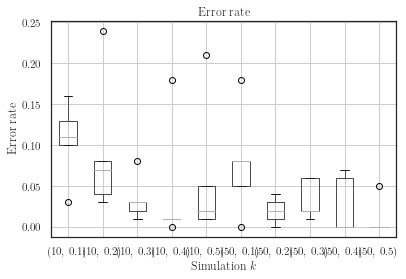

In [415]:

ax = gb_for_error_rate.boxplot(column='error_rate',by=['n_clients','random_clients'])
# ax = gb_for_error_rate[gb_for_error_rate.n_clients == 50].boxplot(column='error_rate',by='random_clients',ax=ax)
plt.title("Error rate")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
ax.set_xlabel('Simulation $k$')
ax.set_ylabel('Error rate')

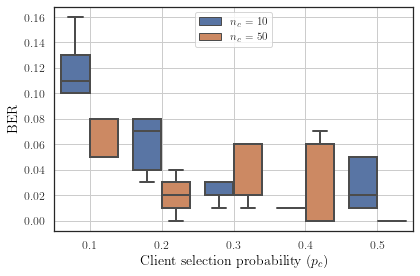

In [1360]:
import matplotlib as mpl
# plt.rcParams["font.family"] = "Times New Roman"
font = {
        'family': "Times New Roman",
        'color': 'black',
#         'weight': 'high',
#         'size': 14,
        }

# sns.set_theme(style="white")
ax = sns.boxplot(x='random_clients', y='error_rate', data=gb_for_error_rate, hue='n_clients', linewidth=2, showfliers=False)
# plt.title('Error rate as function of \n the probability to be selected',fontdict=font,pad=20)
plt.xlabel('Client selection probability ($p_c$)',fontsize=14, fontdict=font)
plt.ylabel('BER',fontsize=14, fontdict=font)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['$n_c$ = 10','$n_c$ = 50'], loc="upper center")
# ,prop={'family':font['family']}
plt.grid()
plt.tight_layout()
# plt.savefig('plots/error-rate-probability.png', dpi=300)
# plt.savefig('plots/error-rate-probability.svg', dpi=300)
# plt.savefig('plots/error-rate-probability.eps', dpi=300)
# plt.savefig('plots/error-rate-probability.pdf', dpi=300)


In [1356]:
gb_for_error_rate.to_csv('error_rate_nn.csv',index=False)

### error rate and frame length 
 - box plot frame length

In [381]:
frame_start = df_total_label[df_total_label['E'] == 'Frame start'].copy()

frame_start['n_x'] =  frame_start.groupby(['sim_n','block'])['X'].shift(1)
frame_start['frame_length'] = frame_start['X'] - frame_start['n_x']  

In [382]:
frame_start.dropna(inplace=True)

In [383]:
columns_to_groupby

['n_clients', 'network_type', 'random_clients', 'n_bits', 'sim_n', 'block']

In [384]:
frame_start_dd = frame_start[columns_to_groupby+['frame_length']].drop_duplicates()

In [385]:
frame_start_dd.head()

,n_clients,network_type,random_clients,n_bits,sim_n,block,frame_length
48,10,NN,0.1,100,1,0,44.0
69,10,NN,0.1,100,1,1,65.0
41,10,NN,0.1,100,1,2,37.0
36,10,NN,0.1,100,1,3,32.0
28,10,NN,0.1,100,1,4,24.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


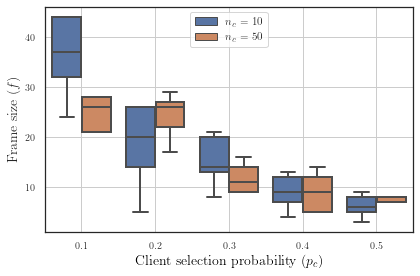

In [1309]:
ax = sns.boxplot(x='random_clients', y='frame_length', data=frame_start_dd, hue='n_clients', linewidth=2, showfliers=False)
# plt.title('Error rate as function of \n the probability to be selected',fontdict=font,pad=20)
plt.xlabel('Client selection probability ($p_c$)',fontsize=14, fontdict=font)
plt.ylabel('Frame size ($f$)',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['$n_c$ = 10','$n_c$ = 50'], loc="upper center")
plt.grid()
plt.tight_layout()
plt.savefig('plots/frame_length-probability.png', dpi=300)
plt.savefig('plots/frame_length-probability.svg', dpi=300)
plt.savefig('plots/frame_length-probability.eps', dpi=300)
plt.savefig('plots/frame_length-probability.pdf', dpi=300)


In [690]:
gb_for_error_rate.shape

(50, 9)

In [692]:
frame_start_dd_s = frame_start_dd[['sim_n','block','frame_length']]

In [696]:
frame_start_dd_s = frame_start_dd_s.astype({'sim_n':int})

In [697]:
gb_for_error_rate.dtypes

n_clients           int64
network_type       object
random_clients    float64
n_bits              int64
sim_n               int64
block               int64
success             int64
error               int64
error_rate        float64
dtype: object

In [698]:
merge = pd.merge(gb_for_error_rate,frame_start_dd_s,on=['sim_n','block'])

In [701]:
merge = merge.sort_values(by='frame_length',ascending=False)

In [76]:
import math

In [77]:
def capacity(x):
    return x*math.log(2*x) + (1-x)*math.log(2*(1-x))  

In [78]:
columns_to_groupby_fin = ['n_clients', 'network_type','random_clients', 'n_bits', 'sim_n']

In [79]:
gb_for_sim = gb_for_error_rate.groupby(columns_to_groupby_fin,as_index=False).agg({'error_rate':['mean','std']})

In [80]:
gb_for_sim

n_clients network_type random_clients n_bits sim_n error_rate          
                                                           mean       std
0        10           NN            0.1    100     1      0.106  0.048270
1        10           NN            0.2    100     3      0.092  0.085264
2        10           NN            0.3    100     5      0.034  0.027019
3        10           NN            0.4    100     7      0.042  0.077266
4        10           NN            0.5    100     9      0.060  0.085440
5        50           NN            0.1    100     2      0.078  0.065727
6        50           NN            0.2    100     4      0.020  0.015811
7        50           NN            0.3    100     6      0.034  0.024083
8        50           NN            0.4    100     8      0.026  0.035777
9        50           NN            0.5    100    10      0.010  0.022361

In [81]:
filtered_10 = gb_for_sim[(gb_for_sim.n_bits == 100) & (gb_for_sim.n_clients == 10) & (gb_for_sim.network_type == 'NN')]
filtered_50 = gb_for_sim[(gb_for_sim.n_bits == 100) & (gb_for_sim.n_clients == 50) & (gb_for_sim.network_type == 'NN')]

In [82]:
filtered_50

n_clients network_type random_clients n_bits sim_n error_rate          
                                                           mean       std
5        50           NN            0.1    100     2      0.078  0.065727
6        50           NN            0.2    100     4      0.020  0.015811
7        50           NN            0.3    100     6      0.034  0.024083
8        50           NN            0.4    100     8      0.026  0.035777
9        50           NN            0.5    100    10      0.010  0.022361

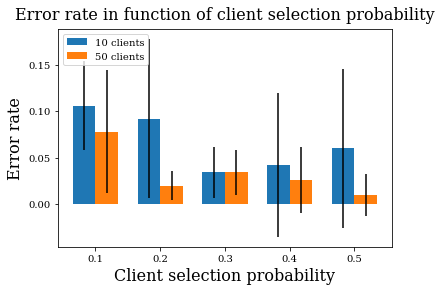

In [86]:
x = np.arange(len(filtered_10.random_clients.unique()))  # the label locations
width = 0.35  # the width of the bars
labels = list(filtered_10.random_clients.unique())
# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

plt.bar(x- width/2,filtered_10['error_rate']['mean'],width,yerr=filtered_10['error_rate']['std'],label='10 clients')
plt.bar(x+ width/2,filtered_50['error_rate']['mean'], width,yerr=filtered_50['error_rate']['std'],label='50 clients')

plt.xticks(x,labels)

plt.title('Error rate in function of client selection probability',fontdict=font,pad=10)
plt.xlabel('Client selection probability',fontdict=font)
plt.ylabel('Error rate',fontdict=font)
plt.legend(loc='upper left')
plt.show()

## Error rate by probability for score based simulations

## Error rate in time

In [1370]:
columns_to_groupby

['n_clients', 'network_type', 'random_clients', 'n_bits', 'sim_n', 'block']

In [31]:
success = df_total_label[df_total_label.E.str.startswith('Successful Transmissions:')][['X']+columns_to_groupby+['success']]

In [32]:
errors = df_total_label[df_total_label.E.str.startswith('Errors:')][['X']+columns_to_groupby+['error']]

In [33]:
success_errors_time = pd.merge(success,errors,on=['X']+columns_to_groupby,how='inner')

success_errors_time['rate'] = success_errors_time['error']/(success_errors_time['error']+success_errors_time['success'])

In [1374]:
success_errors_time.head()

,X,n_clients,network_type,random_clients,n_bits,sim_n,block,success,error,rate
0,134,10,NN,0.1,100,1,0,1,0,0.000000
1,178,10,NN,0.1,100,1,0,1,1,0.500000
2,222,10,NN,0.1,100,1,0,2,1,0.333333
3,266,10,NN,0.1,100,1,0,3,1,0.250000
4,310,10,NN,0.1,100,1,0,4,1,0.200000


In [1375]:
success_errors_time[['sim_n','block']].value_counts().reset_index().sort_values(by='sim_n')

,sim_n,block,0
0,1,0,100
28,1,2,100
29,1,3,100
30,1,4,100
13,1,1,100
31,10,0,100
32,10,1,100
33,10,2,100
34,10,3,100
35,10,4,100


In [336]:
n_clients = 50
n_bits = 100

cond_gb = (success_errors_time['n_bits']==n_bits) & (success_errors_time['n_clients']==n_clients)


filtered_rate = success_errors_time[cond_gb].sort_values(by='sim_n',ascending=False)
filtered_rate = filtered_rate.astype({'sim_n':int})


In [337]:
filtered_rate.columns

Index(['X', 'n_clients', 'network_type', 'random_clients', 'n_bits', 'sim_n',
       'block', 'success', 'error', 'rate'],
      dtype='object')

In [338]:
filtered_rate = filtered_rate.sort_values(by=['sim_n','block','X'])

In [339]:
filtered_rate['counter'] = filtered_rate.groupby(['sim_n','block']).cumcount()+1


In [341]:
filtered_rate = filtered_rate.sort_values(by=['sim_n','block'])

In [342]:
filtered_rate['toplot'] = filtered_rate['error'] - filtered_rate['error'].shift() 

In [34]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

success_errors_time = success_errors_time.sort_values(by=['sim_n','block','X'])

success_errors_time['counter'] = success_errors_time.groupby(['sim_n','block']).cumcount()+1

success_errors_time = success_errors_time.sort_values(by=['sim_n','block'])

success_errors_time['toplot'] = success_errors_time['error'] - success_errors_time['error'].shift() 



def scatter_plot(filtered_rate,random_clients):

    sel = filtered_rate[(filtered_rate['toplot'] == 1) & (filtered_rate['random_clients'] == random_clients) ]
    print(sel.shape)
    regr = linear_model.LinearRegression()

    X = sel['counter']

    y = sel['error']

    regr.fit(np.array(X).reshape(-1, 1), y)

    regr.coef_

    regr.intercept_

    y_pred = regr.predict(np.array(X).reshape(-1, 1))
    y_pred_2 = regr.predict(np.arange(0,101,1).reshape(-1,1))
    
    r2_score(y,y_pred)


    ax = sns.scatterplot(data=sel, hue='n_clients', x='counter', y='error',marker='x',palette='Set1',s=50)
#     s = plt.scatter(x = sel.counter,y=sel.error,marker='x',c=sel.n_clients,cmap='viridis',label=c)
    plt.plot(np.arange(0,101,1).reshape(-1,1), y_pred_2, color='blue', linewidth=3)
    plt.ylabel('N. of Errors',fontdict=font)
    plt.xlabel('N. of bits sent',fontdict=font)
    handles, _ = ax.get_legend_handles_labels()          
    plt.legend(handles, ['N. of Clients 10','N. of Clients 50'], loc="upper center")
    
    plt.grid()
    plt.ylim((0,25))
    plt.tight_layout()
    plt.savefig('plots/error-rate-scatter_{}_hue.png'.format(random_clients), dpi=300)
    plt.savefig('plots/error-rate-scatter_{}_hue.svg'.format(random_clients), dpi=300)
    plt.savefig('plots/error-rate-scatter_{}_hue.eps'.format(random_clients), dpi=300)
    plt.savefig('plots/error-rate-scatter_{}_hue.pdf'.format(random_clients), dpi=300)

    plt.show()

def scatter_plot_seaborn(filtered_rate,random_clients):

    sel = filtered_rate[(filtered_rate['toplot'] == 1) & (filtered_rate['random_clients'] == random_clients) ]
    print(sel.shape)
    regr = linear_model.LinearRegression()

    X = sel['counter']

    y = sel['error']

    regr.fit(np.array(X).reshape(-1, 1), y)

    regr.coef_

    regr.intercept_

    y_pred = regr.predict(np.array(X).reshape(-1, 1))
    y_pred_2 = regr.predict(np.arange(0,101,1).reshape(-1,1))
    
    r2_score(y,y_pred)

    ax = sns.regplot(data=sel, x='counter', y='error',marker='+',scatter_kws={'s':100})

#     ax = sns.scatterplot(data=sel, hue='n_clients', x='counter', y='error',marker='x',palette='seismic',s=50)
#     s = plt.scatter(x = sel.counter,y=sel.error,marker='x',c=sel.n_clients,cmap='viridis',label=c)
#     plt.plot(np.arange(0,101,1).reshape(-1,1), y_pred_2, color='blue', linewidth=3)
    plt.ylabel('N. of Errors',fontdict=font)
    plt.xlabel('N. of bits sent',fontdict=font)
#     handles, _ = ax.get_legend_handles_labels()          
#     plt.legend(handles, ['N. of Clients 10','N. of Clients 50'], loc="upper center")
    
#     plt.legend(loc='best')
    plt.grid()
    plt.ylim((0,25))
    plt.savefig('plots/error-rate-scatter_{}.png'.format(random_clients), dpi=300)
    plt.savefig('plots/error-rate-scatter_{}.svg'.format(random_clients), dpi=300)
    plt.savefig('plots/error-rate-scatter_{}.eps'.format(random_clients), dpi=300)
    plt.savefig('plots/error-rate-scatter_{}.pdf'.format(random_clients), dpi=300)

    plt.show()

0.1
(92, 12)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


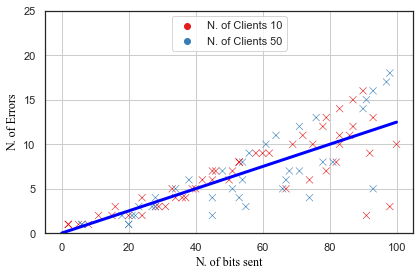

0.2
(55, 12)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


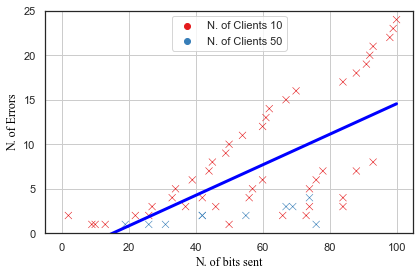

0.3
(34, 12)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


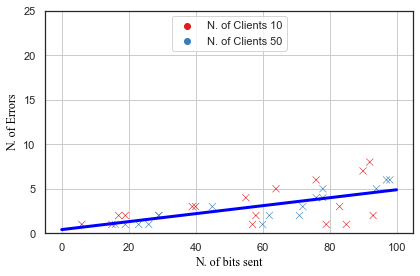

0.4
(34, 12)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


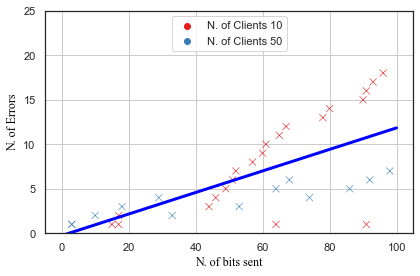

0.5
(34, 12)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


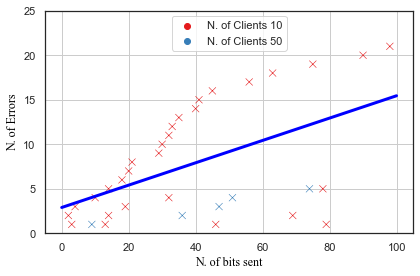

In [35]:
for i in [0.1,0.2,0.3,0.4,0.5]:
    print(i)
    scatter_plot(success_errors_time,i)

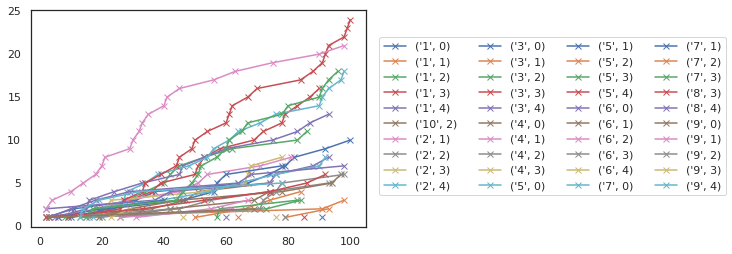

In [898]:
for x,gb in success_errors_time[success_errors_time['toplot'] == 1].groupby(['sim_n','block']):
    plt.plot(gb.counter,gb.error,'-x',label="{}".format(x))
plt.legend(loc='upper left',ncol=4,bbox_to_anchor=(1.025, 0.9),)
plt.show()

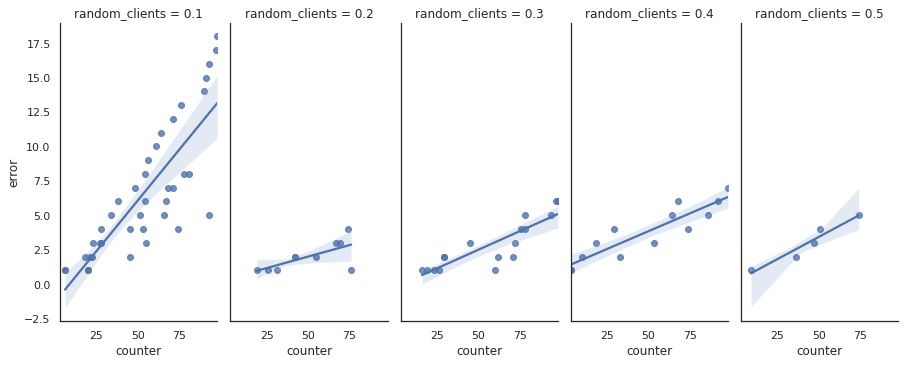

In [543]:
sns.lmplot(x="counter", y="error", col="random_clients", data=filtered_rate[(filtered_rate['toplot'] == 1)],
           aspect=.5);


### Split on 5 different plots 

### Plot over time in group of ten bits per time with error bars

In [388]:
success_errors_time['tenth'] = success_errors_time['counter'] // 10

In [389]:
gb_filtered = success_errors_time.groupby(['sim_n','tenth'],as_index=False).agg(
    mean_error = pd.NamedAgg(column='rate', aggfunc='mean'),
    std_error = pd.NamedAgg(column='rate', aggfunc='std'),
    sim_n = pd.NamedAgg(column='sim_n', aggfunc='first'),
    random_clients = pd.NamedAgg(column='random_clients', aggfunc='first'),
    network_type = pd.NamedAgg(column='network_type', aggfunc='first'),
    n_bits = pd.NamedAgg(column='n_bits', aggfunc='first'),
    n_clients = pd.NamedAgg(column='n_clients', aggfunc='first'),
)

In [390]:
gb_filtered.head()

,tenth,mean_error,std_error,sim_n,random_clients,network_type,n_bits,n_clients
0,0,0.143748,0.137641,1,0.1,NN,100,10
1,1,0.094766,0.038132,1,0.1,NN,100,10
2,2,0.085693,0.037188,1,0.1,NN,100,10
3,3,0.092486,0.036568,1,0.1,NN,100,10
4,4,0.099735,0.043684,1,0.1,NN,100,10


In [391]:
import math

### try black and white with different markers

In [392]:
mpl.rcParams['axes.labelcolor'] = 'black'

In [1128]:
font

{'fontname': 'Times New Roman',
 'color': 'black',
 'weight': 'normal',
 'size': 12}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


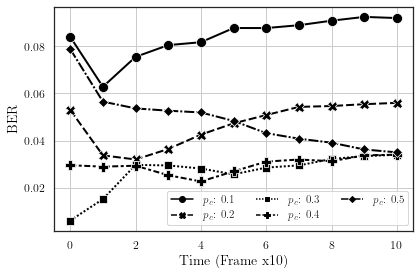

In [1129]:
# plt.figure(figsize=(6,5))
ax = sns.lineplot(data=success_errors_time,
                  x="tenth",
                  y="rate",
                  markers=True,
                  dashes=True,
                  hue='random_clients',
                  style='random_clients',
                  palette=['black']*len(success_errors_time.random_clients.unique()),
                  ci=None,
                  linewidth=2,
#                   alpha=0.8,
                markersize=10
                 )
handles, _ = ax.get_legend_handles_labels()

labels = ['$p_c$: {}'.format(v) for v in sorted(success_errors_time.random_clients.unique())]
plt.xlabel('Time (Frame x10)',fontsize=14,fontdict=font)
plt.ylabel('BER',fontsize=14,fontdict=font)
plt.xticks(fontsize=12,**font)
plt.yticks(fontsize=12,**font)

plt.legend(handles,labels, loc='lower right',
#            bbox_to_anchor=(0.5, 1.05),
           ncol=3)    
plt.grid()
# plt.gray()
plt.tight_layout()

plt.savefig('plots/error-rate_over_time.png', dpi=300)
plt.savefig('plots/error-rate_over_time.eps', dpi=300)
plt.savefig('plots/error-rate_over_time.svg', dpi=300)
plt.savefig('plots/error-rate_over_time.pdf', dpi=300)
plt.show()

## channel capacity computation

#### Leggere i log e caricarsi la lista di bit inviati/ricevuti e per ogni simulazione, contare:
- bit = 0 inviati
- bit = 1 inviati 
- bit = 0 sbagliati
- bit = 1 sbaglati 

In [92]:
directories = glob.glob("toplot/*imulation_*")

In [ ]:

        setup = os.path.join(d,setup_file)
        settings = load(setup)
        n_clients = settings['setup']['n_clients']
        network_type = settings['setup']['network_type']
        random_clients = settings['setup']['random_clients']
        n_bits = settings['setup']['n_bits']

        scores = os.path.join(d,score_file)
        events = os.path.join(d,event_file)
        df_scores = pd.read_csv(scores).drop(columns=['Unnamed: 0'])
        df_events = pd.read_csv(events).drop(columns=['Unnamed: 0'])
        print("scores size: {} {}".format(d,df_scores.shape[0]))
        print("events size: {} {}".format(d,df_events.shape[0]))
        if sim_type == 'score':
            df_scores['y_values'] = df_scores['Y'].str[7:-1]
            df_scores = df_scores.astype({'y_values':float})

        elif sim_type == 'label':
            df_scores['label'] = df_scores.Y.apply(lambda x:clean_y(x))
        df_merged = pd.merge(df_scores,df_events,on='X',how='outer')
        df_merged = populate_columns(df_merged,n_clients,network_type,random_clients,n_bits,sim_n,block)    
        df_merged.fillna(value={'E':'run'},inplace=True)
        df_merged.fillna(method='ffill')




In [99]:
def read_logs(df_total,file_name,setup_file,block):
    sending = []
    receiving = []
    labels_sent = []
    labels_received = []
    with open(file_name) as f:
        for l in f:
            if ('Sender: SENDING ' in l ):
                sending.append(l.strip('\n')[-1:])
            elif ("Receiver: RECEIVED" in l):
                receiving.append(l.strip('\n')[-1:])
            elif ("Sender: frame starts with" in l):
                labels_sent.append(l.strip('\n')[-2:-1])
            elif ("frame ends with" in l):
                labels_received.append(l.strip('\n')[-2:-1])
    print(len(labels_sent),len(labels_received))
    d = {'sent': sending, 'received': receiving[1:],'label_sent':labels_sent,'label_received':labels_received[1:]}
    df = pd.DataFrame(data=d)
    df['error'] = df.apply(lambda x: 1 if x.sent != x.received else 0,axis=1)
    
    settings = load(setup_file)
    n_clients = settings['setup']['n_clients']
    network_type = settings['setup']['network_type']
    random_clients = settings['setup']['random_clients']
    n_bits = settings['setup']['n_bits']
    frame_size = 'random'
    if 'frame_size' in settings['setup'].keys():
            frame_size = settings['setup']['frame_size']
        
    n_channels = 1
    if 'n_channels' in settings['setup'].keys():
        n_channels = settings['setup']['n_channels']
    df = populate_columns(df,n_clients,network_type,random_clients,n_bits,sim_n,block,frame_size,n_channels)
    
    df_total = pd.concat([df_total,df])
    return df_total

In [1064]:
simulation_table.head()

,Simulation #,attack_type,network_type,n_bits,random_clients,n_channels,n_clients,frame_size,trained network,Priority,Who in charge,Completed (Running/Yes/No),#completed tests
0,1,label,NN,100,0.1,1,10,random,yes,yes,Gabriele,No,5.0
1,2,label,NN,100,0.1,1,50,random,yes,yes,Gabriele,No,5.0
2,3,label,NN,100,0.2,1,10,random,yes,NaN,Gabriele,No,5.0
3,4,label,NN,100,0.2,1,50,random,yes,NaN,Gabriele,No,5.0
4,5,label,NN,100,0.3,1,10,random,yes,yes,Gabriele,No,5.0


In [100]:
sim_id_label = list(simulation_table[(simulation_table['Simulation #'] < 11)]['Simulation #'].unique())

df_total_capacity = pd.DataFrame()

for d in directories:
    name,sim_n = d.split('_')
    if int(sim_n) in sim_id_label:
        print('{} is a label simulation'.format(d))
        log_file = "simulazione_{}.out".format(sim_n)
        setup_file = "setup_tests.yaml"
        for i in range(0,5):
            block_log = os.path.join(d,'block_{}'.format(i),log_file)
            block_setup_file = os.path.join(d,'block_{}'.format(i),setup_file)
            df_total_capacity = read_logs(df_total_capacity,block_log,block_setup_file,i)
    else:
        print('problema!')
        

problema!
problema!
problema!
problema!
problema!
problema!
problema!
toplot/Simulation_1 is a label simulation
100 101
100 101
100 101
100 101
100 101
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
toplot/Simulation_2 is a label simulation
100 101
100 101
100 101
100 101
100 101
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
toplot/Simulation_8 is a label simulation
100 101
100 101
100 101
100 101
100 101
problema!
problema!
toplot/Simulation_5 is a label simulation
100 101
100 101
100 101
100 101
100 101
problema!
toplot/Simulation_3 is a label simulation
100 101
100 101
100 101
100 101
100 101
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!
problema!


In [101]:
df_total_capacity.head()

,sent,received,label_sent,label_received,error,n_clients,network_type,random_clients,n_bits,sim_n,block,frame_size,n_channels
0,0,0,8,8,0,10,NN,0.1,100,1,0,random,1
1,1,0,8,8,1,10,NN,0.1,100,1,0,random,1
2,1,1,8,3,0,10,NN,0.1,100,1,0,random,1
3,0,0,3,3,0,10,NN,0.1,100,1,0,random,1
4,1,1,3,8,0,10,NN,0.1,100,1,0,random,1


In [1393]:
df_total_label.head()

,X,Y,label,E,n_clients,network_type,random_clients,n_bits,sim_n,block,success,error
0,90,"tensor([[ -2.7393, -3.8257, -3.8682, 20.620...",8.0,Sender added,10,NN,0.1,100,1,0,0,0
1,90,"tensor([[ -2.7393, -3.8257, -3.8682, 20.620...",8.0,Frame start,10,NN,0.1,100,1,0,0,0
2,91,"tensor([[ -2.7189, -3.7623, -3.9705, 20.482...",8.0,run,10,NN,0.1,100,1,0,0,0
3,92,"tensor([[ -2.7746, -3.5575, -3.5376, 20.825...",8.0,run,10,NN,0.1,100,1,0,0,0
4,93,"tensor([[ -2.8345, -3.3500, -3.8425, 20.929...",8.0,run,10,NN,0.1,100,1,0,0,0


In [102]:
df_total_capacity['counter'] = df_total_capacity.groupby(['sim_n','block']).cumcount()

In [103]:
frame_start = df_total_label[df_total_label['E'] == 'Frame start'].copy()

frame_start['n_x'] =  frame_start.groupby(['sim_n','block'])['X'].shift(1)
frame_start['frame_length'] = frame_start['X'] - frame_start['n_x']
frame_start.fillna(method='backfill',inplace=True)

In [104]:
frame_start['offset'] = frame_start.groupby(['sim_n','block'])['X'].transform('first')

In [105]:
frame_start['counter'] = (frame_start.X-frame_start.offset) // frame_start.frame_length 

In [106]:
frame_start.shape

(5000, 18)

In [107]:
frame_start_slim = frame_start[['frame_length','offset','sim_n','block']].drop_duplicates().copy()

In [108]:
df_total = pd.merge(df_total_label,frame_start_slim,on=['sim_n','block'],how='inner')

In [109]:
df_total.shape

(102650, 16)

In [110]:
df_total['counter'] = (df_total.X-df_total.offset) // df_total.frame_length 

In [111]:
df_total[(df_total['sim_n'] == '1') & (df_total['block'] == 1) & (df_total.counter == -2)]

,X,Y,label,E,n_clients,network_type,random_clients,n_bits,sim_n,block,frame_size,n_channels,success,error,frame_length,offset,counter
11503,2,NaN,NaN,Receiver added,10,NN,0.1,100,1,1,random,1,0,0,65.0,132,-2.0


In [888]:
gb_df_total = df_total.groupby(['sim_n','block','counter'],as_index=False).agg(
    score_start = pd.NamedAgg(column='Y', aggfunc='first'),
    score_end = pd.NamedAgg(column='Y', aggfunc='last'),
    counter = pd.NamedAgg(column='counter', aggfunc='first'),
    sim_n = pd.NamedAgg(column='sim_n', aggfunc='first'),
    block = pd.NamedAgg(column='block', aggfunc='first'),
    random_clients = pd.NamedAgg(column='random_clients', aggfunc='first'),
    network_type = pd.NamedAgg(column='network_type', aggfunc='first'),
    n_bits = pd.NamedAgg(column='n_bits', aggfunc='first'),
    n_clients = pd.NamedAgg(column='n_clients', aggfunc='first'),
    first_x = pd.NamedAgg(column='X', aggfunc='first'),
    last_x = pd.NamedAgg(column='X', aggfunc='last'),
    first_label = pd.NamedAgg(column='label', aggfunc='first'),
    last_label = pd.NamedAgg(column='label', aggfunc='last'),
).dropna()

In [889]:
gb_df_total[['sim_n','block']].value_counts()

sim_n  block
1      0        100
7      2        100
5      2        100
       3        100
       4        100
6      0        100
       1        100
       2        100
       3        100
       4        100
7      0        100
       1        100
       3        100
1      1        100
7      4        100
8      0        100
       1        100
       2        100
       3        100
       4        100
9      0        100
       1        100
       2        100
       3        100
5      1        100
       0        100
4      4        100
       3        100
1      2        100
       3        100
       4        100
10     0        100
       1        100
       2        100
       3        100
       4        100
2      0        100
       1        100
       2        100
       3        100
       4        100
3      0        100
       1        100
       2        100
       3        100
       4        100
4      0        100
       1        100
       2        100
9      

In [114]:
df_total_capacity.counter.values

array([ 0,  1,  2, ..., 97, 98, 99])

In [890]:
df_merged_fs_capacity = pd.merge(gb_df_total,df_total_capacity,on=['sim_n','block','counter'],how='inner')

In [891]:
labels_sent = df_merged_fs_capacity.groupby(['sim_n','block'])['label_sent'].unique().reset_index()

In [892]:
labels_sent.head()

,sim_n,block,label_sent
0,1,0,"[8, 3]"
1,1,1,"[8, 3]"
2,1,2,"[8, 3]"
3,1,3,"[8, 3]"
4,1,4,"[8, 3]"


In [893]:
def get_scores(x,labels_sent):
    if 'tensor' in x.score_start:
        l = [float(e) for e in x.score_start.replace('tensor([[','').replace(']])','').replace('\n','').split(', ')]
        l_np = np.asarray(l)
        sel_labels = labels_sent[(labels_sent['sim_n'] == x.sim_n) & (labels_sent['block'] == x.block) ]
        for el in sorted(sel_labels['label_sent']):
            return l_np[int(el[0])],l_np[int(el[1])]

In [894]:
def get_scores_end(x,labels_sent):
    if 'tensor' in x.score_end:
        l = [float(e) for e in x.score_end.replace('tensor([[','').replace(']])','').replace('\n','').split(', ')]
        l_np = np.asarray(l)
        sel_labels = labels_sent[(labels_sent['sim_n'] == x.sim_n) & (labels_sent['block'] == x.block) ]
        for el in sorted(sel_labels['label_sent']):
            return l_np[int(el[0])],l_np[int(el[1])]

In [895]:
df_merged_fs_capacity['score_h_s'], df_merged_fs_capacity['score_l_s'] = zip(*df_merged_fs_capacity.apply(lambda x:get_scores(x,labels_sent),axis=1))

In [896]:
df_merged_fs_capacity['score_h_e'], df_merged_fs_capacity['score_l_e'] = zip(*df_merged_fs_capacity.apply(lambda x:get_scores_end(x,labels_sent),axis=1))

In [897]:
cols = ['sent','received','label_sent','label_received','error','score_h_s','score_l_s','score_h_e','score_l_e','first_label','last_label','first_x','last_x'] #+ ['score_{}'.format(i) for i in range(0,10)]

In [123]:
def get_single_score(x,i):
    if 'tensor' in x:
        l = [float(e) for e in x.replace('tensor([[','').replace(']])','').replace('\n','').split(', ')]
        l_np = np.asarray(l)
        return l_np[i]

In [1417]:
# for i in range(0,10):
#     print(i)
#     df_merged_fs_capacity['score_{}'.format(i)] = df_merged_fs_capacity.Y.apply(lambda x:get_single_score(x,i))

In [898]:
df_merged_fs_capacity[cols].to_csv('score_start_end.csv',index=False)

\mathcal s_h(t) &=\: b \cdot z_l(t-1) + (1 - b) \cdot z_h(t-1)


In [899]:
df_merged_fs_capacity['diff'] = df_merged_fs_capacity.score_l_e - df_merged_fs_capacity.score_h_e

In [900]:
df_merged_fs_capacity['diff_expected'] = np.sign(df_merged_fs_capacity['diff'])

In [901]:
def signal_expected(x):
    factor = 1
    if x.error == 1:
        factor = -1
    return factor*x.diff_expected

In [903]:
gb_capacity = df_merged_fs_capacity.loc[df_merged_fs_capacity.groupby(['sim_n','block'])['diff'].idxmax()]

In [904]:
gb_capacity = gb_capacity[['sim_n','block','diff']]

In [905]:
df_merged = pd.merge(df_merged_fs_capacity,gb_capacity,on=['sim_n','block'],how='left')

In [906]:
df_merged['diff_scaled'] = df_merged['diff_x'] / df_merged['diff_y']

In [907]:
df_merged_fs_capacity = df_merged.copy()

In [908]:
df_merged_fs_capacity['diff_expected'] = df_merged_fs_capacity.apply(lambda x:signal_expected(x),axis=1)

In [909]:
df_merged_fs_capacity[cols[:-4] + ['diff_scaled','diff_expected']]

,sent,received,label_sent,label_received,error,score_h_s,score_l_s,score_h_e,score_l_e,diff_scaled,diff_expected
0,0,0,8,8,0,23.7750,20.6208,24.1624,21.3285,-0.102658,-1.0
1,1,0,8,8,1,24.1071,21.4102,8.7725,8.4057,-0.013287,1.0
2,1,1,8,3,0,10.5538,7.7022,-3.1620,18.8487,0.797336,1.0
3,0,0,3,3,0,-2.4954,19.0479,-2.5328,19.5609,0.800343,1.0
4,1,1,3,8,0,-2.1788,20.2233,10.0771,8.0631,-0.072957,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1,3,8,0,8.1678,10.6025,9.4007,4.4295,-0.058236,-1.0
4996,0,0,8,8,0,9.4139,4.5839,9.4271,5.0552,-0.051215,-1.0
4997,1,1,8,3,0,9.4192,5.1521,8.2798,12.0691,0.044390,1.0
4998,1,1,3,8,0,8.1912,11.5008,8.5016,7.3325,-0.013696,-1.0


In [910]:
df_merged_fs_capacity['rumore'] = df_merged_fs_capacity['diff_scaled'] - df_merged_fs_capacity['diff_expected'] 

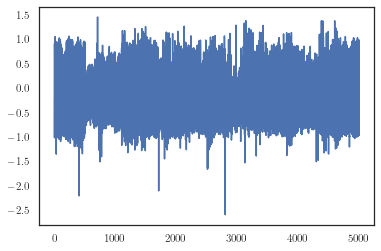

In [911]:
plt.plot(df_merged_fs_capacity['rumore'])

In [1160]:
df_merged_fs_capacity.columns

Index(['score_start', 'score_end', 'counter', 'sim_n', 'block',
       'random_clients_x', 'network_type_x', 'n_bits_x', 'n_clients_x',
       'first_x', 'last_x', 'first_label', 'last_label', 'sent', 'received',
       'label_sent', 'label_received', 'error', 'n_clients_y',
       'network_type_y', 'random_clients_y', 'n_bits_y', 'frame_size',
       'n_channels', 'score_h_s', 'score_l_s', 'score_h_e', 'score_l_e',
       'diff_x', 'diff_expected', 'diff_y', 'diff_scaled', 'rumore', 'snr',
       'binned'],
      dtype='object')

In [1188]:
gb_rumore = df_merged_fs_capacity.groupby('sim_n',as_index=False)['rumore'].std()

merged_rumore_std = pd.merge(df_merged_fs_capacity,gb_rumore,on='sim_n')

merged_rumore_std.columns

merged_rumore_std['snr'] = merged_rumore_std['diff_scaled']**2 / merged_rumore_std['rumore_y'].std()**2

merged_rumore_std['snr'] = merged_rumore_std['snr'].apply(lambda x:10*math.log10(x))

In [1189]:
test_cnn = pd.read_csv('snr_ber_cnn.csv')

In [1236]:
test.sort_values('error_rate',ascending=False)

,binned,error_sum,bit_sent,error_rate
2,-30,6,11,0.545455
0,-40,2,4,0.500000
1,-35,3,8,0.375000
4,-20,16,62,0.258065
3,-25,8,35,0.228571
5,-15,16,118,0.135593
6,-10,25,189,0.132275
7,-5,35,364,0.096154
8,0,56,787,0.071156
9,5,52,1256,0.041401


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


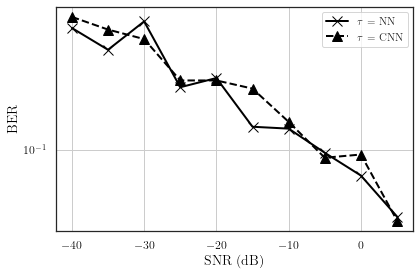

In [1233]:
bins = np.arange(-40,15,5)

labels = [b for b in bins]

merged_rumore_std['binned'] = pd.cut(merged_rumore_std['snr'], bins=bins,labels=labels[:-1])

test = merged_rumore_std.groupby(['binned'],as_index=False).agg(
    error_sum = pd.NamedAgg(column='error', aggfunc='sum'),
    bit_sent = pd.NamedAgg(column='error', aggfunc='count'))

test['error_rate'] = test['error_sum'] / test['bit_sent']

test = test.sort_values('binned')

plt.plot(test.binned,test.error_rate,'x-',c='black',label=r'$\tau$ = NN',linewidth=2,markersize=10)
plt.plot(test_cnn.binned,test_cnn.error_rate,'^--',c='black',label=r'$\tau$ = CNN',linewidth=2,markersize=10)
plt.xlabel('SNR (dB)',fontsize=14,fontdict=font)
plt.ylabel('BER',fontsize=14,fontdict=font)
plt.xticks(fontsize=12,**font)
plt.yticks(fontsize=12,**font)
plt.grid()
plt.legend(loc='best')
plt.yscale('log')

plt.tight_layout()

plt.savefig('plots/snr_ber.png', dpi=300)
plt.savefig('plots/snr_ber.eps', dpi=300)
plt.savefig('plots/snr_ber.svg', dpi=300)
plt.savefig('plots/snr_ber.pdf', dpi=300)
plt.show()

In [1199]:
test = merged_rumore_std.groupby(['sim_n','binned']).agg(
    error_sum = pd.NamedAgg(column='error', aggfunc='sum'),
    bit_sent = pd.NamedAgg(column='error', aggfunc='count')).reset_index()


In [1201]:
test['error_rate'] = test['error_sum'] / test['bit_sent']

test = test.sort_values(['sim-n','binned'])

In [1215]:
test = test.sort_values(['sim-n','binned'])

In [1202]:
test.dropna(inplace=True)

In [1204]:
test = test.rename(columns={'sim_n':'sim-n','error_rate':'error-rate'})

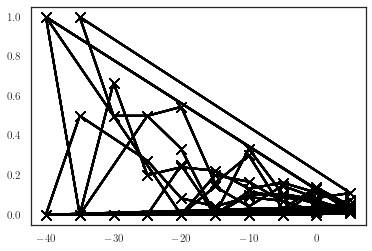

In [1216]:
for x,gb in test.groupby('sim-n'):
    plt.plot(test.binned,test['error-rate'],'x-',c='black',label=r'{}'.format(x),linewidth=2,markersize=10)
plt.show()

In [1225]:
test_sel = test[test['sim-n'].isin(["1","3","5"])]

In [1227]:
test_sel['sim-n'].value_counts()

3    9
1    9
5    8
Name: sim-n, dtype: int64

<AxesSubplot:xlabel='binned', ylabel='error-rate'>

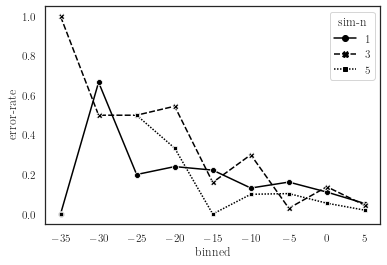

In [1231]:
sns.lineplot(data=test_sel,x='binned',y='error-rate',hue='sim-n',
                 markers=True,
                 dashes=True,
                 style='sim-n',
                 palette=['black']*len(test_sel['sim-n'].unique()),)

In [1193]:
merged_rumore_std.groupby(['sim_n','binned'],as_index=False,dropna=False)

(array([6.000e+00, 1.900e+01, 9.100e+01, 2.560e+02, 8.750e+02, 2.435e+03,
        1.237e+03, 2.500e+01, 1.000e+00, 0.000e+00]),
 array([-63.22970486, -53.66475961, -44.09981436, -34.53486911,
        -24.96992386, -15.40497861,  -5.84003337,   3.72491188,
         13.28985713,  22.85480238,  32.41974763]),
 <BarContainer object of 10 artists>)

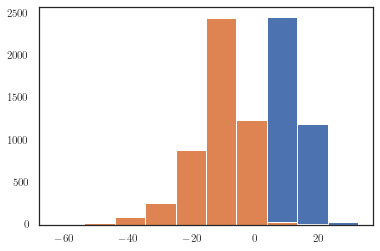

In [1177]:
n,bins,_ = plt.hist(merged_rumore_std['snr'])
plt.hist(df_merged_fs_capacity['snr'],bins=bins)

In [1237]:
df_merged_fs_capacity['snr'] = df_merged_fs_capacity['diff_scaled']**2 / df_merged_fs_capacity['rumore'].std()**2

In [1238]:
df_merged_fs_capacity['snr'] = df_merged_fs_capacity['snr'].apply(lambda x:10*math.log10(x))

In [1239]:
df_merged_fs_capacity = df_merged_fs_capacity[df_merged_fs_capacity.rumore != 0].copy()

In [1243]:
test.sort_values('error_rate',ascending=False)

,binned,error_sum,bit_sent,error_rate
0,-30,24,160,0.150000
1,-25,35,324,0.108025
2,-20,52,644,0.080745
3,-15,47,1207,0.038940
4,-10,33,1346,0.024517
6,0,2,200,0.010000
5,-5,8,834,0.009592


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


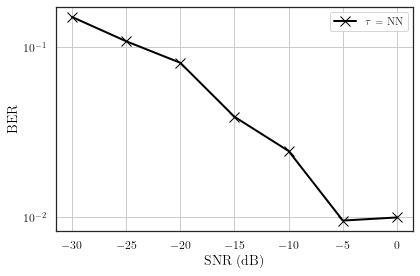

In [1240]:
bins = np.arange(-30,10,5)

labels = [b for b in bins]

df_merged_fs_capacity['binned'] = pd.cut(df_merged_fs_capacity['snr'], bins=bins,labels=labels[:-1])

test = df_merged_fs_capacity.groupby(['binned'],as_index=False).agg(
    error_sum = pd.NamedAgg(column='error', aggfunc='sum'),
    bit_sent = pd.NamedAgg(column='error', aggfunc='count'))

test['error_rate'] = test['error_sum'] / test['bit_sent']

test = test.sort_values('binned')

plt.plot(test.binned,test.error_rate,'x-',c='black',label=r'$\tau$ = NN',linewidth=2,markersize=10)
# plt.plot(test_cnn.binned,test_cnn.error_rate,'^--',c='black',label=r'$\tau$ = CNN',linewidth=2,markersize=10)
plt.xlabel('SNR (dB)',fontsize=14,fontdict=font)
plt.ylabel('BER',fontsize=14,fontdict=font)
plt.xticks(fontsize=12,**font)
plt.yticks(fontsize=12,**font)
plt.grid()
plt.legend(loc='best')
plt.yscale('log')

plt.tight_layout()

plt.savefig('plots/snr_ber.png', dpi=300)
plt.savefig('plots/snr_ber.eps', dpi=300)
plt.savefig('plots/snr_ber.svg', dpi=300)
plt.savefig('plots/snr_ber.pdf', dpi=300)
plt.show()

In [1147]:
test.to_csv('snr_ber_nn.csv')

In [1148]:
test_cnn = pd.read_csv('snr_ber_cnn.csv')

In [1291]:
selection_cnn =  (test_cnn.binned >= -30) & (test_cnn.binned < 0)
selection_nn =   (test.binned >= -30) & (test.binned < 0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


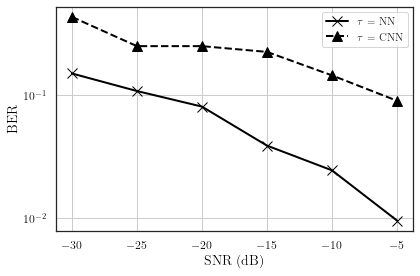

In [1297]:
plt.plot(test[selection_nn].binned,test[selection_nn].error_rate,'x-',c='black',label=r'$\tau$ = NN',linewidth=2,markersize=10)
plt.plot(test_cnn[selection_cnn].binned,test_cnn[selection_cnn].error_rate,'^--',c='black',label=r'$\tau$ = CNN',linewidth=2,markersize=10)
plt.xlabel('SNR (dB)',fontsize=14,fontdict=font)
plt.ylabel('BER',fontsize=14,fontdict=font)
plt.xticks(fontsize=12,**font)
plt.yticks(fontsize=12,**font)
plt.grid()
plt.legend(loc='best')
plt.yscale('log')
# plt.xlim(-35,0)
plt.tight_layout()

plt.savefig('plots/snr_ber.png', dpi=300)
plt.savefig('plots/snr_ber.eps', dpi=300)
plt.savefig('plots/snr_ber.svg', dpi=300)
plt.savefig('plots/snr_ber.pdf', dpi=300)
plt.show()

In [1047]:
# for i in sorted(test['sim-n'].unique()):
#     print(i)
#     plt.plot(test[test['sim-n'] == i].binned,test[test['sim-n'] == i].error_rate,'x-',c='black')
#     plt.ylabel('BER',fontsize=14)
#     plt.xlabel('SNR',fontsize=14)
#     plt.grid()
#     plt.yscale('log')
#     plt.show()

(array([0.00041653, 0.00041653, 0.00166611, 0.00333222, 0.00999666,
        0.01541152, 0.03332221, 0.03540485, 0.00416528, 0.00041653]),
 array([-82.15313953, -72.58819428, -63.02324903, -53.45830378,
        -43.89335853, -34.32841329, -24.76346804, -15.19852279,
         -5.63357754,   3.93136771,  13.49631296]),
 <BarContainer object of 10 artists>)

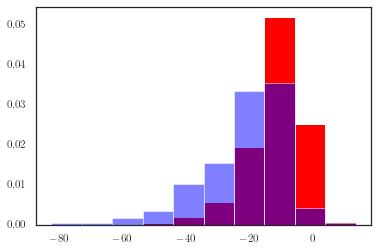

In [1057]:
n,bins,_=plt.hist(df_merged_fs_capacity.snr,color='red',density=True)
plt.hist(df_merged_fs_capacity[df_merged_fs_capacity.error==1].snr,bins=bins,color='blue',density=True,alpha=0.5)


(array([1.000e+00, 4.000e+00, 7.000e+00, 1.900e+01, 9.300e+01, 2.630e+02,
        9.110e+02, 2.445e+03, 1.182e+03, 2.500e+01]),
 array([-82.15313953, -72.58819428, -63.02324903, -53.45830378,
        -43.89335853, -34.32841329, -24.76346804, -15.19852279,
         -5.63357754,   3.93136771,  13.49631296]),
 <BarContainer object of 10 artists>)

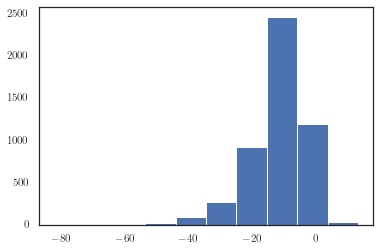

In [1048]:
plt.hist(df_merged_fs_capacity.snr)

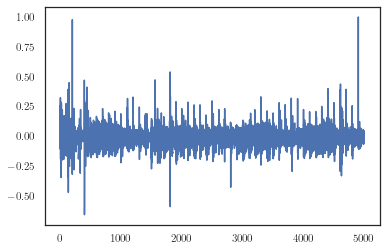

In [614]:
plt.plot(df_merged_fs_capacity['diff_scaled'])

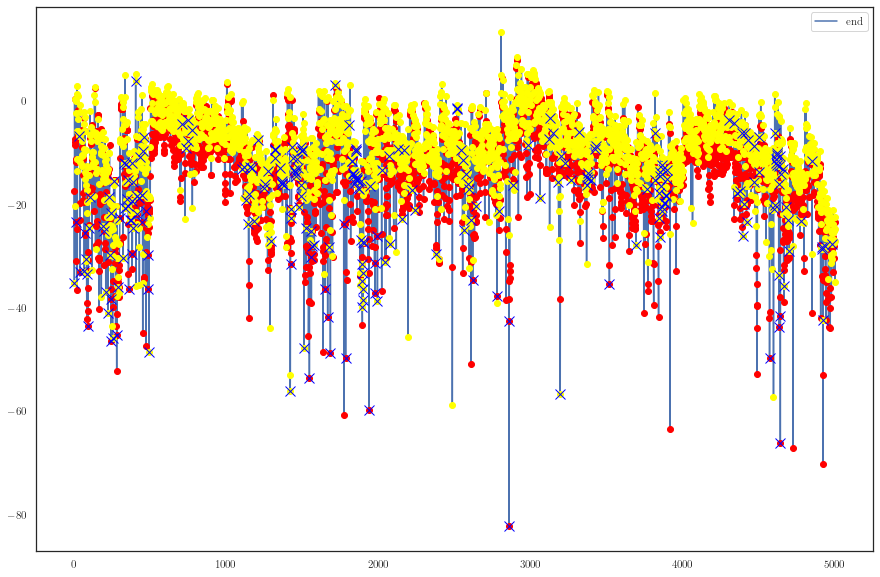

In [1058]:
plt.figure(figsize=(15,10))
plt.plot(df_merged_fs_capacity.snr,label='end')
plt.plot(df_merged_fs_capacity[(df_merged_fs_capacity['sent'] == '0')].snr,'o',color='red')
plt.plot(df_merged_fs_capacity[(df_merged_fs_capacity['sent'] == '1')].snr,'o',color='yellow')
# plt.plot(sel.snr_s,label='start')
plt.plot(df_merged_fs_capacity[(df_merged_fs_capacity['error'] == 1) ].snr,'x',color='blue',markersize=10)
# plt.plot(sel[(sel['error'] == 1) & (sel['sent'] == '1') ].snr_e,'^')
plt.legend(loc='best')

In [1080]:
df_merged_fs_capacity.columns

Index(['score_start', 'score_end', 'counter', 'sim_n', 'block',
       'random_clients_x', 'network_type_x', 'n_bits_x', 'n_clients_x',
       'first_x', 'last_x', 'first_label', 'last_label', 'sent', 'received',
       'label_sent', 'label_received', 'error', 'n_clients_y',
       'network_type_y', 'random_clients_y', 'n_bits_y', 'frame_size',
       'n_channels', 'score_h_s', 'score_l_s', 'score_h_e', 'score_l_e',
       'diff_x', 'diff_expected', 'diff_y', 'diff_scaled', 'rumore', 'snr',
       'binned'],
      dtype='object')

In [1084]:
gb_snr = df_merged_fs_capacity.groupby(['sim_n','block'],as_index=False).agg(
    snr_avg = pd.NamedAgg(column='snr', aggfunc='mean'),
    sim_n = pd.NamedAgg(column='sim_n', aggfunc='first'),
    block = pd.NamedAgg(column='block', aggfunc='first'),
)

In [1059]:
gb_per_bit = df_total_capacity.groupby(['sim_n','block','sent'],as_index=False).agg(
    errors = pd.NamedAgg(column='error', aggfunc='sum'),
    total_sent = pd.NamedAgg(column='sent', aggfunc='count'),
    sim_n = pd.NamedAgg(column='sim_n', aggfunc='first'),
    random_clients = pd.NamedAgg(column='random_clients', aggfunc='first'),
    network_type = pd.NamedAgg(column='network_type', aggfunc='first'),
    n_bits = pd.NamedAgg(column='n_bits', aggfunc='first'),
    n_clients = pd.NamedAgg(column='n_clients', aggfunc='first'),
)

In [1060]:
gb_per_bit.head()

,block,sent,errors,total_sent,sim_n,random_clients,network_type,n_bits,n_clients
0,0,0,4,51,1,0.1,NN,100,10
1,0,1,6,49,1,0.1,NN,100,10
2,1,0,2,52,1,0.1,NN,100,10
3,1,1,1,48,1,0.1,NN,100,10
4,2,0,3,53,1,0.1,NN,100,10


In [1061]:
'block','sent','errors','total_sent','sim_n','random_clients','network_type','n_bits','n_clients'

('block',
 'sent',
 'errors',
 'total_sent',
 'sim_n',
 'random_clients',
 'network_type',
 'n_bits',
 'n_clients')

In [1062]:
gb_per_bit_0 = gb_per_bit[gb_per_bit['sent'] == '0'].drop(columns=['sent']).copy()
gb_per_bit_1 = gb_per_bit[gb_per_bit['sent'] == '1'].drop(columns=['sent']).copy()

In [1063]:
gb_per_bit_0.rename(columns={'total_sent':'total_sent_0','errors':'errors_0'},inplace=True)
gb_per_bit_1.rename(columns={'total_sent':'total_sent_1','errors':'errors_1'},inplace=True)

In [1064]:
gb_per_bit_0.columns

Index(['block', 'errors_0', 'total_sent_0', 'sim_n', 'random_clients',
       'network_type', 'n_bits', 'n_clients'],
      dtype='object')

In [1065]:
sim_with_error_per_bit = pd.merge(gb_per_bit_0,gb_per_bit_1,on=['block','sim_n','random_clients','network_type','n_bits','n_clients'])

In [1066]:
sim_with_error_per_bit.head()

,block,errors_0,total_sent_0,sim_n,random_clients,network_type,n_bits,n_clients,errors_1,total_sent_1
0,0,4,51,1,0.1,NN,100,10,6,49
1,1,2,52,1,0.1,NN,100,10,1,48
2,2,3,53,1,0.1,NN,100,10,8,47
3,3,4,53,1,0.1,NN,100,10,12,47
4,4,6,44,1,0.1,NN,100,10,7,56


In [1067]:
def get_capacity(x):
    capacity_0 = 0.5*(x.error_rate_0 + (1 - x.error_rate_0)*math.log2(1 - x.error_rate_0))
    capacity_1 = 0.5*(x.error_rate_1 + (1 - x.error_rate_1)*math.log2(1 - x.error_rate_1))
    return 1 + capacity_0 + capacity_1

In [1068]:
sim_with_error_per_bit['error_rate_0'] = sim_with_error_per_bit.errors_0 / sim_with_error_per_bit.total_sent_0 

In [1069]:
sim_with_error_per_bit['error_rate_1'] = sim_with_error_per_bit.errors_1 / sim_with_error_per_bit.total_sent_1

In [1070]:
sim_with_error_per_bit['error_rate_1'].mean()

0.08458201415248688

In [1071]:
import math

In [1072]:
sim_with_error_per_bit['capacity'] = sim_with_error_per_bit.apply(lambda x:get_capacity(x),axis=1)

In [1073]:
sim_with_error_per_bit['error_rate'] = (sim_with_error_per_bit.errors_0 + sim_with_error_per_bit.errors_1)/(sim_with_error_per_bit.total_sent_0 + sim_with_error_per_bit.total_sent_1) 

In [1074]:
sim_with_error_per_bit.head().sort_values(by='error_rate')

,block,errors_0,total_sent_0,sim_n,random_clients,network_type,n_bits,n_clients,errors_1,total_sent_1,error_rate_0,error_rate_1,capacity,error_rate
1,1,2,52,1,0.1,NN,100,10,1,48,0.038462,0.020833,0.987573,0.03
0,0,4,51,1,0.1,NN,100,10,6,49,0.078431,0.122449,0.963458,0.10
2,2,3,53,1,0.1,NN,100,10,8,47,0.056604,0.170213,0.962071,0.11
4,4,6,44,1,0.1,NN,100,10,7,56,0.136364,0.125000,0.955068,0.13
3,3,4,53,1,0.1,NN,100,10,12,47,0.075472,0.255319,0.954704,0.16


In [1076]:
sim_with_error_per_bit.shape

(50, 14)

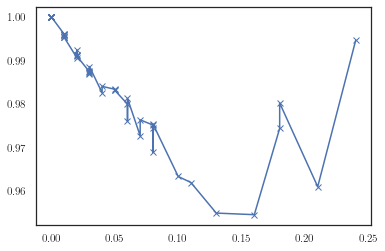

In [1077]:
plt.plot(sim_with_error_per_bit.sort_values(by='error_rate',ascending=False).error_rate,sim_with_error_per_bit.sort_values(by='error_rate',ascending=False).capacity,'x-')
# plt.ylim([0,1])
plt.show()

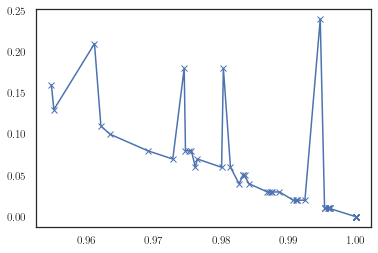

In [1078]:
plt.plot(sim_with_error_per_bit.sort_values(by='capacity',ascending=False).capacity,sim_with_error_per_bit.sort_values(by='capacity',ascending=False).error_rate,'x-')
plt.xlabel('capacity',fontsize=14,fontdict=font)
plt.ylabel('BER',fontsize=14,fontdict=font)
plt.xticks(fontsize=12,**font)
plt.yticks(fontsize=12,**font)
plt.grid()
plt.legend(loc='best')
# plt.yscale('log')

plt.tight_layout()
plt.savefig('plots/cap_ber_cnn.png', dpi=300)
plt.savefig('plots/cap_ber_cnn.eps', dpi=300)
plt.savefig('plots/cap_ber_cnn.svg', dpi=300)
plt.savefig('plots/cap_ber_cnn.pdf', dpi=300)

In [850]:
sim_with_error_per_bit.agg({'total_sent_1':'sum','errors_1':'sum','total_sent_0':'sum','errors_0':'sum'})

total_sent_1    2524
errors_1         209
total_sent_0    2476
errors_0          42
dtype: int64

In [1087]:
merged_capacity_snr = pd.merge(gb_snr,sim_with_error_per_bit,on=['sim_n','block'])

(array([ 2.,  0.,  0.,  2.,  6., 15.,  7.,  8.,  6.,  4.]),
 array([-27.70771031, -25.12334349, -22.53897668, -19.95460986,
        -17.37024305, -14.78587623, -12.20150941,  -9.6171426 ,
         -7.03277578,  -4.44840897,  -1.86404215]),
 <BarContainer object of 10 artists>)

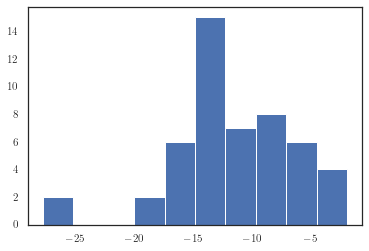

In [1155]:
plt.hist(merged_capacity_snr.snr_avg)

In [1363]:
bins = np.arange(-45,15,7)

labels = [b for b in bins]

merged_capacity_snr['binned'] = pd.cut(merged_capacity_snr['snr_avg'], bins=bins,labels=labels[:-1])

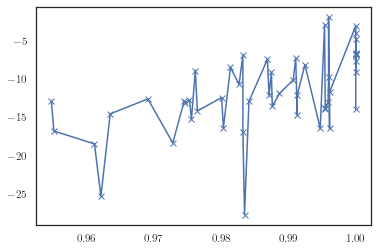

In [1364]:
plt.plot(merged_capacity_snr.sort_values(by='capacity',ascending=False).capacity,merged_capacity_snr.sort_values(by='capacity',ascending=False).snr_avg,'x-')
# plt.ylim([0,1])
plt.show()

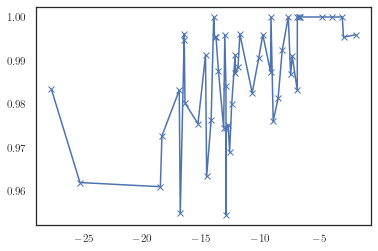

In [1365]:
plt.plot(merged_capacity_snr.sort_values(by='snr_avg',ascending=False).snr_avg,merged_capacity_snr.sort_values(by='snr_avg',ascending=False).capacity,'x-')
# plt.ylim([0,1])
plt.show()

In [1366]:
binned = merged_capacity_snr.groupby(['binned'],as_index=False).agg({'capacity':'mean'})


In [1373]:
binned.dropna(inplace=True)

In [1374]:
binned.head()

,binned,capacity
2,-31,0.972758
3,-24,0.966940
4,-17,0.982932
5,-10,0.993790
6,-3,0.995656


In [1370]:
binned_cnn = pd.read_csv('binned_cnn.csv')

In [1372]:
cap_selection_cnn =  (binned_cnn.binned >= -30) & (binned_cnn.binned < 0)
cap_selection_nn = (binned.binned >= -30) & (binned.binned < 0)

TypeError: Invalid comparison between dtype=category and int

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


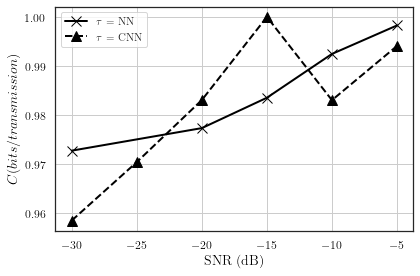

In [1304]:
plt.plot(binned[cap_selection_nn].binned,binned[cap_selection_nn].capacity,'x-',c='black',label=r'$\tau$ = NN',linewidth=2,markersize=10)
plt.plot(binned_cnn[cap_selection_cnn].binned,binned_cnn[cap_selection_cnn].capacity,'^--',c='black',label=r'$\tau$ = CNN',linewidth=2,markersize=10)
plt.xlabel('SNR (dB)',fontsize=14,fontdict=font)
plt.ylabel('$C (bits/transmission)$',fontsize=14,fontdict=font)
plt.xticks(fontsize=12,**font)
plt.yticks(fontsize=12,**font)
plt.grid()
plt.legend(loc='best')
# plt.yscale('log')

plt.tight_layout()
plt.savefig('plots/snr_cap.png', dpi=300)
plt.savefig('plots/snr_cap.eps', dpi=300)
plt.savefig('plots/snr_cap.svg', dpi=300)
plt.savefig('plots/snr_cap.pdf', dpi=300)
plt.show()

In [979]:
def simple_get_capacity(error_rate_0,error_rate_1):
    capacity_0 = 0.5*(error_rate_0 + (1 - error_rate_0)*math.log2(1 - error_rate_0))
    capacity_1 = 0.5*(error_rate_1 + (1 - error_rate_1)*math.log2(1 - error_rate_1))
    return 1 + capacity_0 + capacity_1




In [980]:
error_rates_0 = np.arange(0,1,0.1)


In [981]:
error_rates_1 = np.arange(0,1,0.1)

In [982]:
values = [] 
for e_0 in error_rates_0:
    for e_1 in error_rates_1:
        values.append(simple_get_capacity(e_0,e_1))

In [983]:
values

[1.0,
 0.9815986079497275,
 0.971228762045055,
 0.9698993895095847,
 0.9789103217501381,
 1.0,
 1.0356143810225276,
 1.089455160875069,
 1.167807190511264,
 1.283903595255632,
 0.9815986079497275,
 0.9631972158994551,
 0.9528273699947827,
 0.9514979974593122,
 0.9605089296998657,
 0.9815986079497275,
 1.017212988972255,
 1.0710537688247967,
 1.1494057984609913,
 1.2655022032053593,
 0.971228762045055,
 0.9528273699947826,
 0.9424575240901101,
 0.9411281515546397,
 0.9501390837951932,
 0.971228762045055,
 1.0068431430675826,
 1.0606839229201241,
 1.139035952556319,
 1.255132357300687,
 0.9698993895095847,
 0.9514979974593122,
 0.9411281515546397,
 0.9397987790191693,
 0.9488097112597228,
 0.9698993895095847,
 1.0055137705321122,
 1.0593545503846538,
 1.1377065800208483,
 1.2538029847652166,
 0.9789103217501381,
 0.9605089296998657,
 0.9501390837951933,
 0.9488097112597228,
 0.9578206435002763,
 0.9789103217501381,
 1.0145247027726656,
 1.0683654826252074,
 1.146717512261402,
 1.26281391

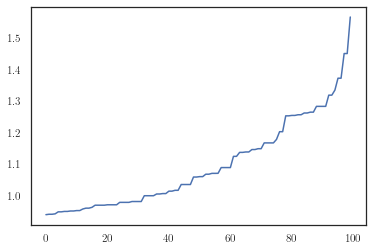

In [984]:
plt.plot(sorted(values))

### Multichannel experiments

In [1441]:
simulation_table.head()

,Simulation #,attack_type,network_type,n_bits,random_clients,n_channels,n_clients,frame_size,trained network,Priority,Who in charge,Completed (Running/Yes/No),#completed tests
0,1,label,NN,100,0.1,1,10,random,yes,yes,Gabriele,No,5.0
1,2,label,NN,100,0.1,1,50,random,yes,yes,Gabriele,No,5.0
2,3,label,NN,100,0.2,1,10,random,yes,NaN,Gabriele,No,5.0
3,4,label,NN,100,0.2,1,50,random,yes,NaN,Gabriele,No,5.0
4,5,label,NN,100,0.3,1,10,random,yes,yes,Gabriele,No,5.0


In [424]:
sim_id_label = list(simulation_table[(simulation_table['Simulation #'] > 60) & (simulation_table['Simulation #'] < 81) ]['Simulation #'].unique())


def generate_dataframe(d,score_file,event_file,sim_type,df_total,block):
    try: 
        setup = os.path.join(d,setup_file)
        settings = load(setup)
        n_clients = settings['setup']['n_clients']
        network_type = settings['setup']['network_type']
        random_clients = settings['setup']['random_clients']
        n_bits = settings['setup']['n_bits']
        frame_size = 'random'
        if 'frame_size' in settings['setup'].keys():
            frame_size = settings['setup']['frame_size']
        
        n_channels = 1
        if 'n_channels' in settings['setup'].keys():
            n_channels = settings['setup']['n_channels']
        
        scores = os.path.join(d,score_file)
        events = os.path.join(d,event_file)
        df_scores = pd.read_csv(scores).drop(columns=['Unnamed: 0'])
        df_events = pd.read_csv(events).drop(columns=['Unnamed: 0'])
        print("scores size: {} {}".format(d,df_scores.shape[0]))
        print("events size: {} {}".format(d,df_events.shape[0]))
        if sim_type == 'score':
            df_scores['y_values'] = df_scores['Y'].str[7:-1]
            df_scores = df_scores.astype({'y_values':float})

#         elif sim_type == 'label':
#             df_scores['label'] = df_scores.Y.apply(lambda x:clean_y(x))
        df_merged = pd.merge(df_scores,df_events,on='X',how='outer')
        df_merged = populate_columns(df_merged,n_clients,network_type,random_clients,n_bits,sim_n,block,frame_size,n_channels)    
        df_merged.fillna(value={'E':'run'},inplace=True)
        df_merged.fillna(method='ffill')
        print("\t**merged size: {} {}".format(d,df_merged.shape[0]))
        df_total = pd.concat([df_total,df_merged])
        return df_total
    except Exception as e:
        print(e)
        return df_total

In [1337]:
sim_id_label = list(simulation_table[(simulation_table['Simulation #'] > 60) & (simulation_table['Simulation #'] < 81) ]['Simulation #'].unique())

df_total_channel = pd.DataFrame()

setup_file = "setup_tests.yaml"
label_file = "scoreL.csv"
event_label_file = "eventL.csv"


for d in directories:
    name,sim_n = d.split('_')
    if int(sim_n) in sim_id_label:
        print('{} is a label simulation'.format(d))
        for i in range(0,5):
            block = os.path.join(d,'block_{}'.format(i))
            df_total_channel = generate_dataframe(block,label_file,event_label_file,'label',df_total_channel,i)
    else:
        print('problema! {}'.format(int(sim_n)))



success = df_total_channel[(df_total_channel['E'].str.startswith('FINAL SUCCESSFUL')) ].copy()

def clean_multi(x):
    return int(x.split(': ')[1])

success['success_bits'] = success['E'].apply(lambda x: clean_multi(x))

errors = df_total_channel[(df_total_channel['E'].str.startswith('FINAL ERROR')) ].copy()

errors['errors_bits'] = errors['E'].apply(lambda x: clean_multi(x))

errors.head(1)

errors = errors[['X','errors_bits','sim_n','block']].copy()

df_error_rates = pd.merge(success,errors,on=['X','sim_n','block'])

df_error_rates = df_error_rates.sort_values(by=['sim_n','block'])

df_error_rates['error_rate'] = df_error_rates.errors_bits / (df_error_rates.errors_bits + df_error_rates.success_bits) 

toplot/Simulation_74 is a label simulation
scores size: toplot/Simulation_74/block_0 800
events size: toplot/Simulation_74/block_0 605
	**merged size: toplot/Simulation_74/block_0 1205
scores size: toplot/Simulation_74/block_1 800
events size: toplot/Simulation_74/block_1 605
	**merged size: toplot/Simulation_74/block_1 1205
scores size: toplot/Simulation_74/block_2 800
events size: toplot/Simulation_74/block_2 605
	**merged size: toplot/Simulation_74/block_2 1205
scores size: toplot/Simulation_74/block_3 800
events size: toplot/Simulation_74/block_3 605
	**merged size: toplot/Simulation_74/block_3 1205
scores size: toplot/Simulation_74/block_4 800
events size: toplot/Simulation_74/block_4 605
	**merged size: toplot/Simulation_74/block_4 1205
problema! 112
problema! 102
problema! 97
problema! 96
problema! 81
problema! 106
problema! 1
problema! 25
problema! 111
problema! 121
problema! 94
problema! 120
toplot/Simulation_71 is a label simulation
scores size: toplot/Simulation_71/block_0 8

	**merged size: toplot/Simulation_79/block_2 1205
scores size: toplot/Simulation_79/block_3 800
events size: toplot/Simulation_79/block_3 605
	**merged size: toplot/Simulation_79/block_3 1205
scores size: toplot/Simulation_79/block_4 800
events size: toplot/Simulation_79/block_4 605
	**merged size: toplot/Simulation_79/block_4 1205
problema! 90
problema! 26
toplot/Simulation_61 is a label simulation
scores size: toplot/Simulation_61/block_0 800
events size: toplot/Simulation_61/block_0 605
	**merged size: toplot/Simulation_61/block_0 1205
scores size: toplot/Simulation_61/block_1 800
events size: toplot/Simulation_61/block_1 605
	**merged size: toplot/Simulation_61/block_1 1205
scores size: toplot/Simulation_61/block_2 800
events size: toplot/Simulation_61/block_2 605
	**merged size: toplot/Simulation_61/block_2 1205
scores size: toplot/Simulation_61/block_3 800
events size: toplot/Simulation_61/block_3 605
	**merged size: toplot/Simulation_61/block_3 1205
scores size: toplot/Simulatio

In [1338]:
gb_error_rates = df_error_rates.groupby('sim_n').agg(
    error_rate_mean = pd.NamedAgg(column='error_rate', aggfunc='mean'),
    sim_n = pd.NamedAgg(column='sim_n', aggfunc='first'),
    block = pd.NamedAgg(column='block', aggfunc='first'),
    random_clients = pd.NamedAgg(column='random_clients', aggfunc='first'),
    network_type = pd.NamedAgg(column='network_type', aggfunc='first'),
    n_bits = pd.NamedAgg(column='n_bits', aggfunc='first'),
    n_clients = pd.NamedAgg(column='n_clients', aggfunc='first'),
    n_channels=pd.NamedAgg(column='n_channels', aggfunc='first'))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


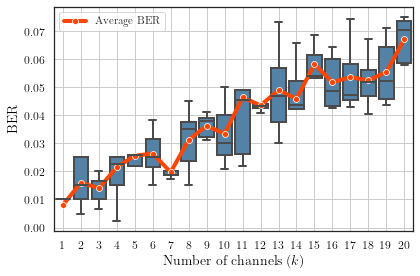

In [1339]:
# font = {'family': 'times',
#         'color': 'black',
#         'weight': 'normal',
#         'size': 12,
#         }
# sns.set_theme(style="white")
ax = sns.boxplot(x='n_channels', y='error_rate', data=df_error_rates, color='steelblue', linewidth=2, showfliers=False)
sns.lineplot(x=gb_error_rates.n_channels-1,y=gb_error_rates.error_rate_mean,linewidth=4,ax=ax,color='orangered',label='Average BER',marker='o')
plt.xlabel('Number of channels ($k$)',fontsize=14,fontdict=font)
plt.ylabel('BER',fontsize=14,fontdict=font)
plt.xticks(fontsize=12,**font)
plt.yticks(fontsize=12,**font)
# handles, _ = ax.get_legend_handles_labels()          
# ax.legend(handles, ['$n_c$ = 10','$n_c$ = 50'], loc="upper center")
plt.grid()
plt.tight_layout()
plt.savefig('plots/error-rate-probability-multi.png', dpi=300)
plt.savefig('plots/error-rate-probability-multi.svg', dpi=300)
plt.savefig('plots/error-rate-probability-multi.eps', dpi=300)
plt.savefig('plots/error-rate-probability-multi.pdf', dpi=300)
plt.show()

In [1616]:
df_error_rates.sim_n.unique()

array(['61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71',
       '72', '73', '74', '75', '76', '77', '78', '79', '80'], dtype=object)

In [1602]:
df_error_rates.groupby('sim_n').

,X,Y,E,n_clients,network_type,random_clients,n_bits,sim_n,block,frame_size,n_channels,success_bits,errors_bits,error_rate
10,716,NaN,FINAL SUCCESSFUL TRANSMISSIONS: 99,10,NN,0.5,100,101,0,6,1,99,1,0.01
11,716,NaN,FINAL SUCCESSFUL TRANSMISSIONS: 98,10,NN,0.5,100,101,1,6,1,98,2,0.02
12,716,NaN,FINAL SUCCESSFUL TRANSMISSIONS: 98,10,NN,0.5,100,101,2,6,1,98,2,0.02
13,818,NaN,FINAL SUCCESSFUL TRANSMISSIONS: 100,10,NN,0.5,100,101,3,6,1,100,0,0.00
14,614,NaN,FINAL SUCCESSFUL TRANSMISSIONS: 97,10,NN,0.5,100,101,4,6,1,97,3,0.03


In [1340]:
sim_id_label = list(simulation_table[(simulation_table['Simulation #'] > 100) & (simulation_table['Simulation #'] < 111) ]['Simulation #'].unique())

df_total_frame = pd.DataFrame()

setup_file = "setup_tests.yaml"
label_file = "scoreL.csv"
event_label_file = "eventL.csv"


for d in directories:
    name,sim_n = d.split('_')
    if int(sim_n) in sim_id_label:
        print('{} is a label simulation'.format(d))
        for i in range(0,5):
            block = os.path.join(d,'block_{}'.format(i))
            df_total_frame = generate_dataframe(block,label_file,event_label_file,'label',df_total_frame,i)
    else:
        print('problema! {}'.format(int(sim_n)))

problema! 74
problema! 112
toplot/Simulation_102 is a label simulation
scores size: toplot/Simulation_102/block_0 500
events size: toplot/Simulation_102/block_0 405
	**merged size: toplot/Simulation_102/block_0 805
scores size: toplot/Simulation_102/block_1 1000
events size: toplot/Simulation_102/block_1 405
	**merged size: toplot/Simulation_102/block_1 1305
scores size: toplot/Simulation_102/block_2 1000
events size: toplot/Simulation_102/block_2 405
	**merged size: toplot/Simulation_102/block_2 1305
scores size: toplot/Simulation_102/block_3 900
events size: toplot/Simulation_102/block_3 405
	**merged size: toplot/Simulation_102/block_3 1205
scores size: toplot/Simulation_102/block_4 600
events size: toplot/Simulation_102/block_4 405
	**merged size: toplot/Simulation_102/block_4 905
problema! 97
problema! 96
problema! 81
toplot/Simulation_106 is a label simulation
scores size: toplot/Simulation_106/block_0 600
events size: toplot/Simulation_106/block_0 405
	**merged size: toplot/Simu

	**merged size: toplot/Simulation_108/block_4 805


In [1341]:
df_total_frame[(df_total_frame['E'].str.startswith('FINAL ')) ].head()

,X,Y,E,n_clients,network_type,random_clients,n_bits,sim_n,block,frame_size,n_channels
802,512,NaN,FINAL SUCCESSFUL TRANSMISSIONS: 94,10,NN,0.5,100,102,0,7,1
803,512,NaN,FINAL ERROR: 6,10,NN,0.5,100,102,0,7,1
1302,1022,NaN,FINAL SUCCESSFUL TRANSMISSIONS: 100,10,NN,0.5,100,102,1,7,1
1303,1022,NaN,FINAL ERROR: 0,10,NN,0.5,100,102,1,7,1
1302,1022,NaN,FINAL SUCCESSFUL TRANSMISSIONS: 100,10,NN,0.5,100,102,2,7,1


In [1342]:
success = df_total_frame[(df_total_frame['E'].str.startswith('FINAL SUCCESSFUL')) ].copy()
success['success_bits'] = success['E'].apply(lambda x: clean_multi(x))

errors = df_total_frame[(df_total_frame['E'].str.startswith('FINAL ERROR')) ].copy()

errors['errors_bits'] = errors['E'].apply(lambda x: clean_multi(x))

errors.head(1)

errors = errors[['X','errors_bits','sim_n','block']].copy()

df_error_rates = pd.merge(success,errors,on=['X','sim_n','block'])

df_error_rates = df_error_rates.sort_values(by=['sim_n','block'])

In [1343]:
df_error_rates.head()

,X,Y,E,n_clients,network_type,random_clients,n_bits,sim_n,block,frame_size,n_channels,success_bits,errors_bits
10,716,NaN,FINAL SUCCESSFUL TRANSMISSIONS: 99,10,NN,0.5,100,101,0,6,1,99,1
11,716,NaN,FINAL SUCCESSFUL TRANSMISSIONS: 98,10,NN,0.5,100,101,1,6,1,98,2
12,716,NaN,FINAL SUCCESSFUL TRANSMISSIONS: 98,10,NN,0.5,100,101,2,6,1,98,2
13,818,NaN,FINAL SUCCESSFUL TRANSMISSIONS: 100,10,NN,0.5,100,101,3,6,1,100,0
14,614,NaN,FINAL SUCCESSFUL TRANSMISSIONS: 97,10,NN,0.5,100,101,4,6,1,97,3


In [1344]:
df_error_rates['error_rate'] = df_error_rates.errors_bits / (df_error_rates.errors_bits + df_error_rates.success_bits) 

In [1345]:
df_error_rates.n_channels.unique()

array([1])

In [1346]:
gb_error_rates = df_error_rates.groupby('sim_n').agg(
    error_rate_mean = pd.NamedAgg(column='error_rate', aggfunc='mean'),
    sim_n = pd.NamedAgg(column='sim_n', aggfunc='first'),
    block = pd.NamedAgg(column='block', aggfunc='first'),
    random_clients = pd.NamedAgg(column='random_clients', aggfunc='first'),
    network_type = pd.NamedAgg(column='network_type', aggfunc='first'),
    n_bits = pd.NamedAgg(column='n_bits', aggfunc='first'),
    n_clients = pd.NamedAgg(column='n_clients', aggfunc='first'),
    n_channels=pd.NamedAgg(column='n_channels', aggfunc='first'),
    frame_size =pd.NamedAgg(column='frame_size', aggfunc='first')
)

In [1347]:
gb_error_rates.frame_size.unique()

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

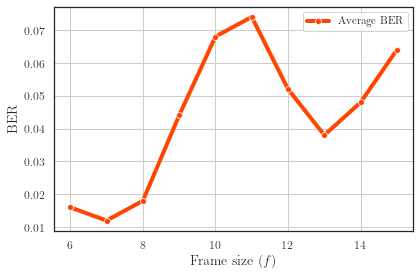

In [1354]:
sns.lineplot(x=gb_error_rates.frame_size,y=gb_error_rates.error_rate_mean,linewidth=4,color='orangered',label='Average BER',marker='o')
plt.xlabel('Frame size ($f$)',fontsize=14)
plt.ylabel('BER',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# handles, _ = ax.get_legend_handles_labels()          
# ax.legend(handles, ['$n_c$ = 10','$n_c$ = 50'], loc="upper center")
plt.grid()
plt.tight_layout()

In [1349]:
sns.lineplot(x=gb_error_rates.frame_size,y=gb_error_rates.error_rate_mean,linewidth=4,ax=ax,color='orangered',label='Average BER',marker='o')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


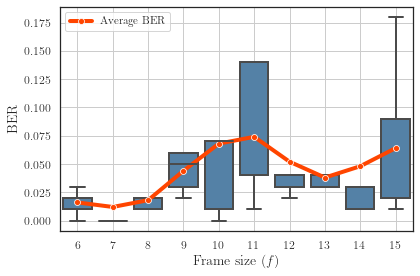

In [1362]:
# font = {'family': 'Times New Roman',
#         'color': 'black',
#         'weight': 'normal',
#         'size': 12,
#         }
ax = sns.boxplot(x='frame_size', y='error_rate', data=df_error_rates, color='steelblue', linewidth=2, showfliers=False)
sns.lineplot(x=gb_error_rates.frame_size-6,y=gb_error_rates.error_rate_mean,linewidth=4,ax=ax,color='orangered',label='Average BER',marker='o')
# plt.plot(range(6,16),gb_error_rates.error_rate_mean,linewidth=4,color='orangered',label='Average BER',marker='o')
plt.xlabel('Frame size ($f$)',fontsize=14)
plt.ylabel('BER',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# handles, _ = ax.get_legend_handles_labels()          
# ax.legend(handles, ['$n_c$ = 10','$n_c$ = 50'], loc="upper center")
plt.grid()
plt.tight_layout()
plt.savefig('plots/error-rate-probability-frame_w_a.png', dpi=300)
plt.savefig('plots/error-rate-probability-frame_w_a.svg', dpi=300)
plt.savefig('plots/error-rate-probability-frame_w_a.eps', dpi=300)
plt.savefig('plots/error-rate-probability-frame_w_a.pdf', dpi=300)
plt.show()

In [1588]:
df_error_rates.sim_n.unique()

array(['101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110'], dtype=object)

In [1679]:
sim_id_label

[111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]

In [439]:
sim_id_label = list(simulation_table[(simulation_table['Simulation #'] > 110) & (simulation_table['Simulation #'] < 122) ]['Simulation #'].unique())

df_total_accuracy = pd.DataFrame()

setup_file = "setup_tests.yaml"
label_file = "scoreL.csv"
event_label_file = "eventL.csv"


for d in directories:
    name,sim_n = d.split('_')
    if int(sim_n) in sim_id_label:
        print('{} is a label simulation'.format(d))
        for i in range(0,5):
            block = os.path.join(d,'block_{}'.format(i))
            df_total_accuracy = generate_dataframe(block,label_file,event_label_file,'label',df_total_accuracy,i)
    else:
        print('problema! {}'.format(int(sim_n)))

problema! 74
toplot/Simulation_112 is a label simulation
scores size: toplot/Simulation_112/block_0 600
events size: toplot/Simulation_112/block_0 1206
	**merged size: toplot/Simulation_112/block_0 1206
[Errno 2] No such file or directory: 'toplot/Simulation_112/block_1/setup_tests.yaml'
[Errno 2] No such file or directory: 'toplot/Simulation_112/block_2/setup_tests.yaml'
[Errno 2] No such file or directory: 'toplot/Simulation_112/block_3/setup_tests.yaml'
[Errno 2] No such file or directory: 'toplot/Simulation_112/block_4/setup_tests.yaml'
problema! 102
problema! 97
problema! 96
problema! 81
problema! 106
problema! 1
problema! 25
toplot/Simulation_111 is a label simulation
scores size: toplot/Simulation_111/block_0 600
events size: toplot/Simulation_111/block_0 1205
	**merged size: toplot/Simulation_111/block_0 1205
[Errno 2] No such file or directory: 'toplot/Simulation_111/block_1/setup_tests.yaml'
[Errno 2] No such file or directory: 'toplot/Simulation_111/block_2/setup_tests.yaml'

In [440]:
df_accuracy = df_total_accuracy[df_total_accuracy.E.str.startswith('accuracy:')].copy()

In [441]:
def get_accuracy(x):
    return float(x.split(': ')[1])

In [442]:
df_accuracy['accuracy'] = df_accuracy.E.apply(lambda x:get_accuracy(x))

In [443]:
sorted(df_accuracy.sim_n.unique())

['111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121']

In [444]:
df_accuracy['accuracy'] = df_accuracy.accuracy.replace(0.0, method='bfill')

111
112
113
114


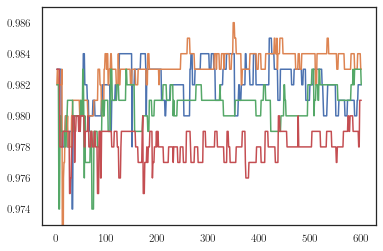

In [445]:
for x,gb in df_accuracy[df_accuracy['sim_n'].astype(int)<115].groupby('sim_n'):
    print(x)
    plt.plot(gb.X,gb.accuracy)
plt.ylim((0.973,.987))
plt.show()

In [446]:
df_accuracy.groupby('sim_n').agg({'X':'first'})

,X
sim_n,
111,2
112,2
113,2
114,2
115,2
116,2
117,2
118,2
119,2


In [447]:
df_accuracy_plot = df_accuracy[df_accuracy['n_channels'].astype(int).isin([1,5,10])].copy()

In [448]:
df_accuracy_plot['bit_time'] = (df_accuracy_plot.X - 2) // df_accuracy_plot.frame_size

In [449]:
gb_accuracy =  df_accuracy_plot.groupby(['sim_n','bit_time'],as_index=False).agg(
    accuracy_mean = pd.NamedAgg(column='accuracy', aggfunc='mean'),
    sim_n = pd.NamedAgg(column='sim_n', aggfunc='first'),
    block = pd.NamedAgg(column='block', aggfunc='first'),
    random_clients = pd.NamedAgg(column='random_clients', aggfunc='first'),
    network_type = pd.NamedAgg(column='network_type', aggfunc='first'),
    n_bits = pd.NamedAgg(column='n_bits', aggfunc='first'),
    n_clients = pd.NamedAgg(column='n_clients', aggfunc='first'),
    n_channels = pd.NamedAgg(column='n_channels', aggfunc='first'))

In [450]:
gb_accuracy.bit_time.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


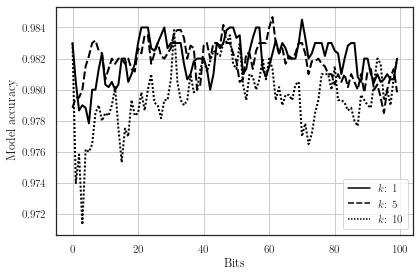

In [452]:
# plt.figure(figsize=(10,5))
ax = sns.lineplot(data=gb_accuracy,
                  x="bit_time",
                  y="accuracy_mean",
#                   markers=True,
                  dashes=True,
                  hue='n_channels',
                  style='n_channels',
                  palette=['black']*len(gb_accuracy.n_channels.unique()),
                  ci=None,
                  linewidth=2,
                  markersize=3
                 )
handles, _ = ax.get_legend_handles_labels()

labels = ['$k$: {}'.format(v) for v in sorted(gb_accuracy.n_channels.unique())]
plt.xlabel('Bits',fontdict=font)
plt.ylabel('Model accuracy',fontdict=font)

plt.legend(handles,labels, loc='lower right',
#            bbox_to_anchor=(0.5, 1.05),
           ncol=1)    
plt.grid()
plt.gray()
plt.tight_layout()

plt.savefig('plots/accuracy_over_time.png', dpi=300)
plt.savefig('plots/accuracy_over_time.eps', dpi=300)
plt.savefig('plots/accuracy_over_time.svg', dpi=300)
plt.savefig('plots/accuracy_over_time.pdf', dpi=300)
plt.show()

In [453]:
gb_accuracy.head()

,bit_time,accuracy_mean,sim_n,block,random_clients,network_type,n_bits,n_clients,n_channels
0,0,0.983000,111,0,0.5,NN,100,10,1
1,1,0.980500,111,0,0.5,NN,100,10,1
2,2,0.978667,111,0,0.5,NN,100,10,1
3,3,0.979000,111,0,0.5,NN,100,10,1
4,4,0.978833,111,0,0.5,NN,100,10,1


In [454]:
zero = df_accuracy[df_accuracy.n_channels == 0]

In [455]:
zero.head()

,X,Y,E,n_clients,network_type,random_clients,n_bits,sim_n,block,frame_size,n_channels,accuracy
2,2,[],accuracy: 0,10,NN,0.5,100,121,0,6,0,0.982
5,3,[],accuracy: 0.982,10,NN,0.5,100,121,0,6,0,0.982
6,4,[],accuracy: 0.982,10,NN,0.5,100,121,0,6,0,0.982
7,5,[],accuracy: 0.982,10,NN,0.5,100,121,0,6,0,0.982
8,6,[],accuracy: 0.983,10,NN,0.5,100,121,0,6,0,0.983


<Figure size 720x1440 with 0 Axes>

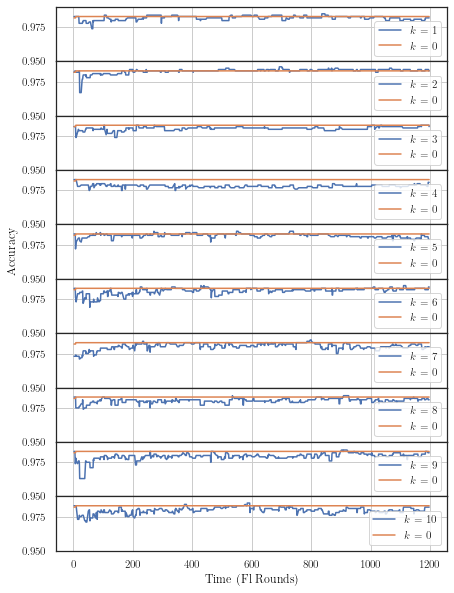

In [456]:
plt.figure(figsize=(10,20))
fig, axs = plt.subplots(10,sharex=True,figsize=(7,10),sharey=True,)

for i in range(0,10):
    s = df_accuracy[df_accuracy['n_channels'].astype(int) == i+1]
    axs[i].plot(s.accuracy,label='$k$ = {}'.format(i+1))
    axs[i].plot(zero.accuracy,label='$k$ = 0')
    axs[i].legend(loc='lower right')
    axs[i].set_ylim((0.95,0.99))
    axs[i].grid()
    if i == 4:
        axs[i].set_ylabel('Accuracy',fontdict=font)

plt.xlabel('Time (Fl Rounds)',fontdict=font)
# plt.ylabel('Model accuracy',fontdict=font)
# plt.tight_layout()
plt.subplots_adjust(hspace=0,wspace=0)

### 

In [733]:
df.error.sum()

10

In [734]:
gb_for_error_rate[gb_for_error_rate['sim_n'] == 1 ]

,n_clients,network_type,random_clients,n_bits,sim_n,block,success,error,error_rate
0,10,NN,0.1,100,1,0,90,10,0.10
1,10,NN,0.1,100,1,1,97,3,0.03
2,10,NN,0.1,100,1,2,89,11,0.11
3,10,NN,0.1,100,1,3,84,16,0.16
4,10,NN,0.1,100,1,4,87,13,0.13


In [1055]:
df_total_label.head()

,X,Y,label,E,n_clients,network_type,random_clients,n_bits,sim_n,block
0,90,"tensor([[ -2.7393, -3.8257, -3.8682, 20.620...",8.0,Sender added,10,NN,0.1,100,1,0
1,90,"tensor([[ -2.7393, -3.8257, -3.8682, 20.620...",8.0,Frame start,10,NN,0.1,100,1,0
2,91,"tensor([[ -2.7189, -3.7623, -3.9705, 20.482...",8.0,run,10,NN,0.1,100,1,0
3,92,"tensor([[ -2.7746, -3.5575, -3.5376, 20.825...",8.0,run,10,NN,0.1,100,1,0
4,93,"tensor([[ -2.8345, -3.3500, -3.8425, 20.929...",8.0,run,10,NN,0.1,100,1,0


## Error rate in time for score attack


In [510]:
success = df_total_score[df_total_score.E.str.startswith('Successful Transmissions:')][['X']+columns_to_groupby+['success']]

In [511]:
errors = df_total_score[df_total_score.E.str.startswith('Errors:')][['X']+columns_to_groupby+['error']]

In [512]:
success_errors_time = pd.merge(success,errors,on=['X']+columns_to_groupby,how='inner')

success_errors_time['rate'] = success_errors_time['error']/(success_errors_time['error']+success_errors_time['success'])

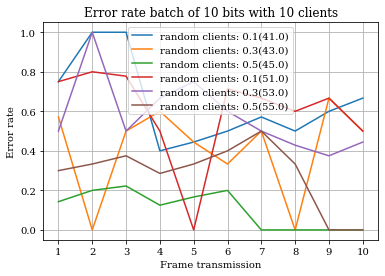

In [516]:
n_clients = 10
n_bits = 10

cond_gb = (success_errors_time['n_bits']==n_bits) & (success_errors_time['n_clients']==n_clients)

filtered_rate = success_errors_time[cond_gb].sort_values(by='sim_n',ascending=False)
filtered_rate = filtered_rate.astype({'sim_n':float})
filtered_rate.sort_values('sim_n')
for key, grp in filtered_rate.groupby(['sim_n']):
    
    label = 'random clients: {}({})'.format(grp.random_clients.iloc[0],grp.sim_n.iloc[0])
    groups = n_bits // 10
    bit_group = grp.groupby(np.arange(len(grp))//groups).agg(lambda x: {'success': x.success.sum(), 
                                                 'error': x.error.sum(),
                                                  'sim_n':x.sim_n.iloc[0],
                                                  'network_type':x.network_type.iloc[0],
                                                   'random_clients':x.random_clients.iloc[0],
                                                   'n_bits':x.n_bits.iloc[0],
                                                   'n_clients':x.n_clients.iloc[0]
                                                  })
    bit_group['rate'] = bit_group.error / (bit_group.success + bit_group.error) 
    plt.plot(range(len(bit_group)), bit_group.rate, label=label)
plt.title('Error rate batch of 10 bits with {} clients'.format(n_clients) )
plt.xticks(range(0,10),range(1,11))
plt.legend(loc='best')
plt.xlabel('Frame transmission')
plt.ylabel('Error rate')
plt.grid()
plt.show()

## count the number of error for 0 / 1

In [350]:
frames = df_total_label[df_total_label['E']=='Frame start'].copy()

In [388]:
frames['prev_label'] = frames.groupby('sim_n')['label'].shift(1)

In [393]:
frames[frames.sim_n == '5'].shape

(100, 12)

In [394]:
def get_bit(x):
    if x.label == x.prev_label:
        return 0
    else:
        return 1

In [395]:
frames['bit_sent'] = frames.apply(lambda x: get_bit(x),axis=1)

In [396]:
frames.head()

,X,Y,label,E,n_clients,network_type,random_clients,n_bits,sim_n,success,error,prev_label,bit_sent
1,44,"tensor([[ -2.5534, -3.8009, -4.3930, 20.628...",8.0,Frame start,10,NN,0.3,100,5,0,0,NaN,1
25,65,"tensor([[ -2.3878, 0.1839, -8.0644, 18.086...",3.0,Frame start,10,NN,0.3,100,5,0,0,8.0,1
49,86,"tensor([[ -2.5296, 0.2453, -7.5033, 17.867...",3.0,Frame start,10,NN,0.3,100,5,0,0,3.0,0
73,107,"tensor([[ -2.5355, 0.9111, -8.4030, 16.320...",3.0,Frame start,10,NN,0.3,100,5,0,0,3.0,0
97,128,"tensor([[ -2.6219, 0.7924, -8.7215, 17.119...",3.0,Frame start,10,NN,0.3,100,5,0,0,3.0,0


In [399]:
_test = pd.merge(df_total_label,frames[['sim_n','X','bit_sent']],on=['sim_n','X'],how='left')

In [418]:
errors = _test[_test['E'].str.contains('Errors:')][['n_clients','network_type','random_clients','n_bits','sim_n','error','bit_sent']]

In [420]:
errors['previous_error'] = errors.groupby('sim_n')['error'].shift(1)

In [425]:
errors[(errors.error - errors.previous_error)>0].bit_sent.value_counts()

0.0    44
1.0     8
Name: bit_sent, dtype: int64

In [400]:
_test.to_csv('test.csv',index=False)

### plot label transmission

In [401]:
settings = load('../label_test/Simulation_46/setup_tests.yaml')

In [402]:
n_clients = settings['setup']['n_clients']
network_type = settings['setup']['network_type']
random_clients = settings['setup']['random_clients']
n_bits = settings['setup']['n_bits']

df_scores = pd.read_csv('../label_test/Simulation_46/scoreL.csv').drop(columns=['Unnamed: 0'])
df_events = pd.read_csv('../label_test/Simulation_46/eventL.csv').drop(columns=['Unnamed: 0'])
print("scores size: {} {}".format(d,df_scores.shape[0]))
print("events size: {} {}".format(d,df_events.shape[0]))
df_merged = pd.merge(df_scores,df_events,on='X',how='outer')

df_merged = populate_columns(df_merged,n_clients,network_type,random_clients,n_bits,sim_n)


scores size: Simulation_55 430
events size: Simulation_55 45


In [403]:
import numpy as np

In [404]:
def clean_y(x):
    print(x)
    l = [float(e) for e in x.replace('tensor([[','').replace(']])','').replace('\n','').split(', ')]
    l_np = np.asarray(l)
    return(l_np.argmax())

In [405]:
df_merged.fillna(value={'E':'run'},inplace=True)

In [406]:
df_merged.fillna(method='ffill',inplace=True)

In [407]:
df_merged = df_merged.sort_values(by='X')

In [408]:
df_merged.head()

,X,Y,E,n_clients,network_type,random_clients,n_bits,sim_n
458,2,"tensor([[-0.2476, -1.0197, -1.4544, 10.7247, -...",Receiver added,10,NN,0.1,10,55
0,88,"tensor([[ -2.6168, -3.7392, -5.0046, 20.414...",Sender added,10,NN,0.1,10,55
1,88,"tensor([[ -2.6168, -3.7392, -5.0046, 20.414...",Frame start,10,NN,0.1,10,55
2,89,"tensor([[ -2.8459, -3.6503, -4.8449, 20.647...",run,10,NN,0.1,10,55
3,90,"tensor([[ -3.2668, -3.2003, -4.6614, 21.257...",run,10,NN,0.1,10,55


In [409]:
df_merged['label'] = df_merged.Y.apply(lambda x:clean_y(x))

tensor([[-0.2476, -1.0197, -1.4544, 10.7247, -7.2667, -9.3813, -4.9705,  2.8151,
         13.8809, -3.2011]])
tensor([[ -2.6168,  -3.7392,  -5.0046,  20.4145, -10.9762,  -1.8441, -14.5304,
         -16.3034,  24.2172,  10.8751]])
tensor([[ -2.6168,  -3.7392,  -5.0046,  20.4145, -10.9762,  -1.8441, -14.5304,
         -16.3034,  24.2172,  10.8751]])
tensor([[ -2.8459,  -3.6503,  -4.8449,  20.6478, -10.7497,  -1.9513, -14.6445,
         -16.2913,  24.1501,  10.6700]])
tensor([[ -3.2668,  -3.2003,  -4.6614,  21.2578, -11.0704,  -1.8599, -14.7144,
         -16.2671,  24.0593,  10.2406]])
tensor([[ -3.1273,  -3.4446,  -4.0442,  21.4171, -11.2315,  -2.1156, -15.0987,
         -16.4170,  24.0455,  10.5139]])
tensor([[ -3.0076,  -3.6575,  -4.4109,  21.0476, -10.8071,  -2.2050, -14.9272,
         -16.3061,  24.1001,  10.6549]])
tensor([[ -3.0872,  -3.5115,  -4.0418,  21.3579, -11.0425,  -2.2399, -15.1053,
         -16.4758,  24.0208,  10.6133]])
tensor([[ -3.1749,  -3.7327,  -4.3673,  21.3080, -

In [410]:
frames = df_merged[df_merged['E']=='Frame start'].copy()

In [411]:
frames['text'] = frames.label == frames.label.shift(1)

In [413]:
frames.shape

(10, 10)

In [166]:
frames['position'] = (frames.X + frames.X.shift(1))/2

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


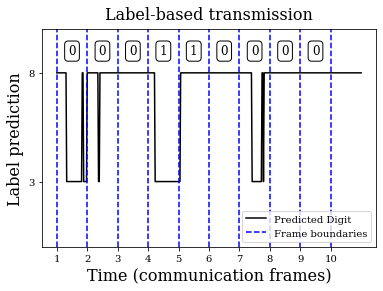

In [192]:

plt.plot(df_merged.iloc[1:,:].X,df_merged.iloc[1:,:]['label'],c='black',label='Predicted Digit')


plt.axvline(x=frames.X.iloc[0],ls='dashed',color='b',label='Frame boundaries')

for i,row in frames.iloc[1:,:].iterrows():
    plt.axvline(x=row.X,ls='dashed',color='b')
    

for i,row in frames.iterrows():
    text = '1'
    if row.text:
        text = '0'
    plt.text(row.position,9,text,family='serif',fontsize=12,ha="center", va="center",bbox=dict(boxstyle="round",fc='white'))


plt.xticks(frames.X,range(1,11),fontname='serif')
plt.yticks([3,8],[3,8],fontname='serif')
plt.ylim((0,10))
plt.title('Label-based transmission',fontdict=font,pad=10)
plt.xlabel('Time (communication frames)',fontdict=font)
plt.ylabel('Label prediction',fontdict=font)
plt.legend(loc ='lower right')
plt.savefig('label-based-transmission.png', dpi=300)
plt.savefig('label-based-transmission.svg', dpi=300)
plt.savefig('label-based-transmission.eps', dpi=300)
plt.savefig('label-based-transmission.pdf', dpi=300)

plt.show()

In [146]:
distinct.head(30)

,X,label
458,2,8
0,88,8
2,89,8
3,90,8
4,91,8
5,92,8
6,93,8
7,94,8
8,95,8
9,96,8


In [125]:
distinct.to_csv('test_label.csv',index=False)

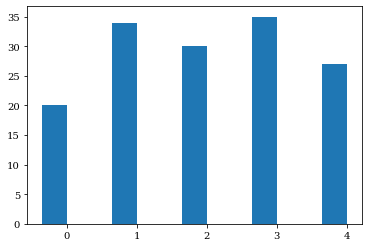

In [279]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

rects1 =  plt.bar(x - width/2, men_means, width, label='Men')
